# Titanic: Machine Learning from Disaster

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective

Predict what sorts of people were likely to survive.

Inspiration:
   - https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
   - https://www.kaggle.com/poonaml/titanic/titanic-survival-prediction-end-to-end-ml-pipeline
   - https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
   - https://www.kaggle.com/arthurlu/titanic/exploratory-tutorial-titanic

## Table of contents


- [Description of the data set](#Description-of-the-data-set)
- [First look at the data](#First-look-at-the-data)
    - [Import Libraries](#Import-Libraries)
    - [Load Data](#Load-Data)
    - [Brief summaries](#Brief-summaries)
- [Visualization](#Visualization)
    - [Basic insight of the data](#Basic-insight-of-the-data)
    - [Focus on the mean of survival](#Focus-on-the-mean-of-survival)
- [Missing Values](#Missing-Values)
    - [Embarked](#Embarked)
    - [Fare](#Fare)
    - [Age with Median](#Age-with-median)
- [Features engineering](#Features-engineering)
    - [Name](#Name)
    - [Family](#Family)
    - [Name](#Name)
- [Visualization new Features](#Visualization-new-features)
    - [Visualization Name](#Visualization-Name)
    - [Visualization Family](#Visualization-Family)
- [Features Encoding](#Features-Encoding)
    - [Categorial features encoding](#Categorial features encoding)
        - [Label Encoding](#Label-Encoding)
        - [One Hot Encoding](#One-Hot-Encodingn)   
    - [Feature Scalling](#Feature-Scalling)
    - [Data Preparation](#Data-Preparation)
- [Features Importance](#Features-Importance)
    - [Correlation - Numerical label](#Correlation---Numerical-label)
    - [Correlation - One Hot Encoder](#Correlation---One-Hot-Encoder)
    - [LDA](#LDA)
    - [Select K Best](#Select-K-Best)
- [Model Selection](#Model-Selection)
    - [Helper function](#Helper-function)
    - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
    - [Random Forest Classifier](#Random-Forest-Classifier)
    - [Adaboost](#Adaboost)
    - [SVC](#SVC)
    - [Logistic Regression](#Logistic-Regression)
    - [Voting Classifier](#Voting-Classifier)
- [Submission](#Submission)



- [Feature Selection](#Feature-selection)
- [Feature Selection](#Feature-selection)

### Description of the data set

## First look at the data

### Import Libraries

In [263]:
# Dataframe
import pandas as pd

# Visualization
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
sns.set_style('whitegrid')
%matplotlib inline

# Sklearn
import sklearn as sk
# Pipeline
from sklearn.pipeline import Pipeline
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Features and model selection
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
# Metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier)

# Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Load data

In [264]:
# Load data directly into a dataframe
df_train=pd.read_csv("Data/Titanic/train.csv")
df_test=pd.read_csv("Data/Titanic/test.csv")

# Get a look at the first rows
df_train.head()

PassengerId  Survived  Pclass  \
0  1            0         3        
1  2            1         1        
2  3            1         3        
3  4            1         1        
4  5            0         3        

                                                  Name     Sex   Age  SibSp  \
0  Braund, Mr. Owen Harris                              male    22.0  1       
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1       
2  Heikkinen, Miss. Laina                               female  26.0  0       
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1       
4  Allen, Mr. William Henry                             male    35.0  0       

   Parch            Ticket     Fare Cabin Embarked  
0  0      A/5 21171         7.2500   NaN   S        
1  0      PC 17599          71.2833  C85   C        
2  0      STON/O2. 3101282  7.9250   NaN   S        
3  0      113803            53.1000  C123  S        
4  0      373450            8.0500   NaN   S

In [265]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0  892          3       Kelly, Mr. James                              male     
1  893          3       Wilkes, Mrs. James (Ellen Needs)              female   
2  894          2       Myles, Mr. Thomas Francis                     male     
3  895          3       Wirz, Mr. Albert                              male     
4  896          3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5  0      0      330911   7.8292   NaN   Q        
1  47.0  1      0      363272   7.0000   NaN   S        
2  62.0  0      0      240276   9.6875   NaN   Q        
3  27.0  0      0      315154   8.6625   NaN   S        
4  22.0  1      1      3101298  12.2875  NaN   S

Variable Description
    - Survived: Survived (1) or died (0)
    - Pclass: Passenger's class
    - Name: Passenger's name
    - Sex: Passenger's sex
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard
    - Parch: Number of parents/children aboard
    - Ticket: Ticket number
    - Fare: Fare
    - Cabin: Cabin
    - Embarked: Port of embarkation
    
    Source of information : https://www.kaggle.com/c/titanic/data

### Brief summaries

In [266]:
print("----------------------------------Informations for the training set----------------------------------\n")
df_train.info()
print('\n',df_train.isnull().sum())
print("\n----------------------------------Informations for the testing set ----------------------------------\n")
df_test.info()
print('\n',df_test.isnull().sum())

----------------------------------Informations for the training set----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

 PassengerId    0  
Survived       0  
Pclass         0  
Name           0  
Sex            0  
Age            177
SibSp          0  
Parch          0  
Ticket         0  
Fare           0  
Cabin          687
Embarked       2  
dtype: int64

----------------------------------Informations for the testing set -

Note that:
    - No Survived feature on the testing set
    - Cabin feature is mostly null --> Will be dropped
    - Embarked feature has a few missing values
    - Some Ages are missing --> Will need to be completed or drop the missing rows
    - Survived and Pclass should be treated as object because they are qualitative

In [267]:
# Dropping Cabin, Ticket and PassengerId
df_train=df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)

df_test=df_test.drop(['Cabin','Ticket'], axis=1)
PassengerId = df_test['PassengerId']

In [268]:
# Changing the type of Pclass and Survived 
df_train['Pclass']=df_train['Pclass'].astype(object)
df_train['Survived']=df_train['Survived'].astype(object)

df_test['Pclass']=df_test['Pclass'].astype(object)

In [269]:
# Basic statistical information about quantitative and qualitative columns

print("----------------------------------Informations for the training set----------------------------------\n")
# Quantitative
display(df_train.describe())
# Qualitative
display(df_train.describe(include=['object']))
print("----------------------------------Informations for the testing set----------------------------------\n")
# Quantitative
display(df_test.describe())
# Qualitative
display(df_test.describe(include=['object']))

----------------------------------Informations for the training set----------------------------------



Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean   29.699118   0.523008    0.381594    32.204208 
std    14.526497   1.102743    0.806057    49.693429 
min    0.420000    0.000000    0.000000    0.000000  
25%    20.125000   0.000000    0.000000    7.910400  
50%    28.000000   0.000000    0.000000    14.454200 
75%    38.000000   1.000000    0.000000    31.000000 
max    80.000000   8.000000    6.000000    512.329200

Survived  Pclass                                    Name   Sex  \
count   891       891     891                                     891    
unique  2         3       891                                     2      
top     0         3       Coutts, Master. William Loch "William"  male   
freq    549       491     1                                       577    

       Embarked  
count   889      
unique  3        
top     S        
freq    644

----------------------------------Informations for the testing set----------------------------------



PassengerId         Age       SibSp       Parch        Fare
count  418.000000   332.000000  418.000000  418.000000  417.000000
mean   1100.500000  30.272590   0.447368    0.392344    35.627188 
std    120.810458   14.181209   0.896760    0.981429    55.907576 
min    892.000000   0.170000    0.000000    0.000000    0.000000  
25%    996.250000   21.000000   0.000000    0.000000    7.895800  
50%    1100.500000  27.000000   0.000000    0.000000    14.454200 
75%    1204.750000  39.000000   1.000000    0.000000    31.500000 
max    1309.000000  76.000000   8.000000    9.000000    512.329200

Pclass                        Name   Sex Embarked
count   418     418                         418   418    
unique  3       418                         2     3      
top     3       Hays, Mr. Charles Melville  male  S      
freq    218     1                           266   270

###  Visualization

#### Basic insight of the data

In [ ]:
# Qualitative Data : [Survived, Sex, Embarked, Pclass] 
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Survived', data=df_train, ax=axis1)
sns.countplot(x='Sex', data=df_train, ax=axis2)
sns.countplot(x='Embarked', data=df_train, ax=axis3)
sns.countplot(x='Pclass', data=df_train, ax=axis4)
fig.suptitle("Basic representation of Qualitative data with count")

In [ ]:
# Discrete Quantitative Data : [SibSp, Parch] 
fig2, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train['SibSp'],ax=axis1)
sns.countplot(df_train['Parch'],ax=axis2)
fig2.suptitle("Basic representation of Discrete Quantitative data with count")

In [ ]:
# Continuous Quantitative Data : [Age, Fare]
fig3, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
sns.distplot(df_train['Age'].dropna(), bins=80, ax=axis1)
sns.distplot(df_train['Fare'], ax=axis2)
fig3.suptitle("Basic representation of Continuous Quantitative data with probability")

In [ ]:
# Age distribution within Sex and Pclass
fig3, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(15,15))

# Age distribution
df_train.Age.plot(kind='kde',ax=axis1)
axis1.set_xlabel("Age")    
axis1.set_title("Age Distribution")

# Age distribution within Sex
df_train.Age[df_train.Sex == 'male'].plot(kind='kde',ax=axis2,)    
df_train.Age[df_train.Sex == 'female'].plot(kind='kde',ax=axis2)
axis2.set_xlabel("Age")    
axis2.set_title("Age Distribution within Sex")
axis2.legend(('Male', 'Female'))

# Age distribution within Pclass
df_train.Age[df_train.Pclass == 1].plot(kind='kde',ax=axis3)    
df_train.Age[df_train.Pclass == 2].plot(kind='kde',ax=axis3)
df_train.Age[df_train.Pclass == 3].plot(kind='kde',ax=axis3)
axis3.set_xlabel("Age")    
axis3.set_title("Age Distribution within Classes")
axis3.legend(('1st Class', '2nd Class','3rd Class'))

#### Focus on the mean of survival

In [ ]:
# [Sex, Pclass, Embarked] by mean of survival
fig4, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Sex',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Embarked',y='Survived', data=df_train, ax=axis2)
sns.barplot(x='Pclass',y='Survived', data=df_train, ax=axis3)
fig4.suptitle("Representation of features linked to the target : Survived ")

In [ ]:
# [SibSp, Parch] by mean of survival
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Representation of features linked to the target : Survived ")

In [ ]:
# Cross relation betwen [Sex, Pclass, Embarked] by mean of survival
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(15,15))
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Sex',y='Survived',hue='Embarked', data=df_train, ax=axis2)

sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='Embarked', data=df_train, ax=axis4)

sns.barplot(x='Embarked',y='Survived',hue='Sex', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='Pclass', data=df_train, ax=axis6)

fig5.suptitle("Cross Representation of the features linked to the target : Survived")

In [ ]:
# Age by mean of survival
fig=sns.barplot(x='Age', y='Survived', data=df_train)

In [ ]:
# Age

# Kernel density of survivor and non survivor by Age
g1 = sns.FacetGrid( df_train , hue='Survived' , aspect=4)
g1.map( sns.kdeplot , 'Age' , shade= True )
g1.add_legend()

# Kernel density of survivor and non survivor by Age and Sex 
g2 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Sex')
g2.map( sns.kdeplot , 'Age' , shade= True )
g2.add_legend()

# Kernel density of survivor and non survivor by Age and Pclass
g3 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Pclass')
g3.map( sns.kdeplot , 'Age' , shade= True )
g3.add_legend()

In [ ]:
# Fare

# Scatterplot Fare & Age
g = sns.FacetGrid(df_train, hue="Survived", size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 550))

# Scatterplot Fare & Age by Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass
g = sns.FacetGrid(df_train, col="Pclass", hue="Survived", size=4)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass & Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", row="Sex" ,margin_titles=True,
                  palette={1:"red", 0:"grey"},size=5)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.set(xlim=(0, 300))


### Features engineering

#### Combined DataFrame

In [270]:
# Creation of a dataframe with train and test for Feature Engineering
def get_combined_data():
    # reading train data
    train = pd.read_csv("Data/Titanic/train.csv")
    
    # reading test data
    test = pd.read_csv("Data/Titanic/test.csv")

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    #train.drop('Survived',axis=1,inplace=True)

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',axis=1,inplace=True)
    
    return combined

def recover_train_test_target(combined):
    
    train0 = pd.read_csv("Data/Titanic/train.csv")
    
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test,targets

In [271]:
combined = get_combined_data()

#### Name

In [272]:
# Name

#Create feature for the length of name 
combined["Name_Length"] = combined["Name"].apply(lambda x: len(x))

# Create a categorical feature Name_Size
combined['Name_Size']=pd.cut(combined['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

# Extract the title from each name
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Map for aggregated titles
Title_Dictionary = {
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dona":       "Royalty",
                    "the Countess":"Royalty"
                    }
    
# Mapping
combined['Title_aggr'] = combined.Title.map(Title_Dictionary)

#### Family

In [273]:
# Family

# Creation of a feature Number_of_relatives = SibSp + Parch
combined['Number_of_relatives']=combined['SibSp']+combined['Parch']

# Creation of a categorical feature Size_Family
combined.loc[combined['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
combined.loc[ (combined['Number_of_relatives'] > 0) 
            & (combined['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
combined.loc[combined['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

We can create 3 categories : 
    - Alone = 0
    - Small = [1,2,3]
    - Big = > 3

### Missing Values

#### Embarked

Fare  Pclass Embarked
61   80.0  1       NaN    
829  80.0  1       NaN

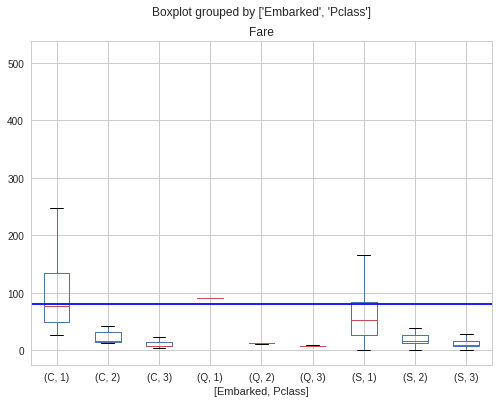

In [274]:
# Embarked

# Get the null rows where Embarked is null
display(combined[combined.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']])

# Embarked missing values
combined.boxplot(column='Fare', by=['Embarked','Pclass'], figsize=(8,6))
plt.axhline(y=80, color='blue')

# Remplace null values by C because most people who are Pclass 1 and Fare 80 has Embarked from C
combined = combined.set_value(combined.Embarked.isnull(), 'Embarked', 'C')

#### Fare

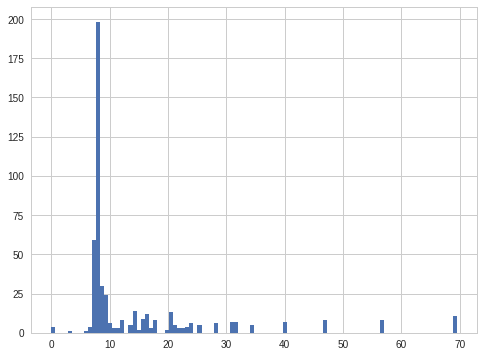

In [275]:
# Fare

# Visualization of the fare which is missing
combined[combined.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
#df_test[(df_test.Pclass==3)&(df_test.Embarked=='S')].Fare.hist(bins=100)
combined.loc[(combined['Pclass']==3) & (combined['Embarked']=='S')].Fare.hist(bins=100,figsize=(8,6))

# Get and affect the median to the missing value
Fare_median=combined[(combined.Pclass==3) & (combined.Embarked=='S')].Fare.median()
#df_test = df_test.set_value(df_test.Fare.isnull(), 'Fare', Fare_median)
combined["Fare"].fillna(Fare_median, inplace=True)

#### Age with median

In [276]:
# Simply fill the nan values with median using Sex, Pclass and Title
grouped = combined.groupby(['Sex','Pclass','Title_aggr'])
age_median = grouped['Age'].median()
display(age_median)
combined["Age"] = combined.groupby(['Sex','Pclass','Title_aggr'])['Age'].transform(lambda x: x.fillna(x.median()))

Sex     Pclass  Title_aggr
female  1       Miss          30.0
                Mrs           45.0
                Officer       49.0
                Royalty       39.0
        2       Miss          20.0
                Mrs           30.0
        3       Miss          18.0
                Mrs           31.0
male    1       Master        6.0 
                Mr            41.5
                Officer       52.0
                Royalty       40.0
        2       Master        2.0 
                Mr            30.0
                Officer       41.5
        3       Master        6.0 
                Mr            26.0
Name: Age, dtype: float64

#### Verification of missing values

In [277]:
combined.isnull().sum()

Age                    0   
Cabin                  1014
Embarked               0   
Fare                   0   
Name                   0   
Parch                  0   
PassengerId            0   
Pclass                 0   
Sex                    0   
SibSp                  0   
Survived               418 
Ticket                 0   
Name_Length            0   
Name_Size              0   
Title                  0   
Title_aggr             0   
Number_of_relatives    0   
Size_Family            0   
dtype: int64

#### Split for visualization

In [278]:
# Split
df_train, df_test, targets = recover_train_test_target(combined)

# Dropping Cabin, Ticket and PassengerId
df_train = df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)
df_test = df_test.drop(['Cabin','Ticket'], axis=1)

In [279]:
df_train.shape

(891, 15)

In [280]:
df_train.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Name_Length', 'Name_Size', 'Title', 'Title_aggr',
       'Number_of_relatives', 'Size_Family'],
      dtype='object')

### Visualization new Features

#### Visualization Name

TypeError: unsupported operand type(s) for /: 'str' and 'int'

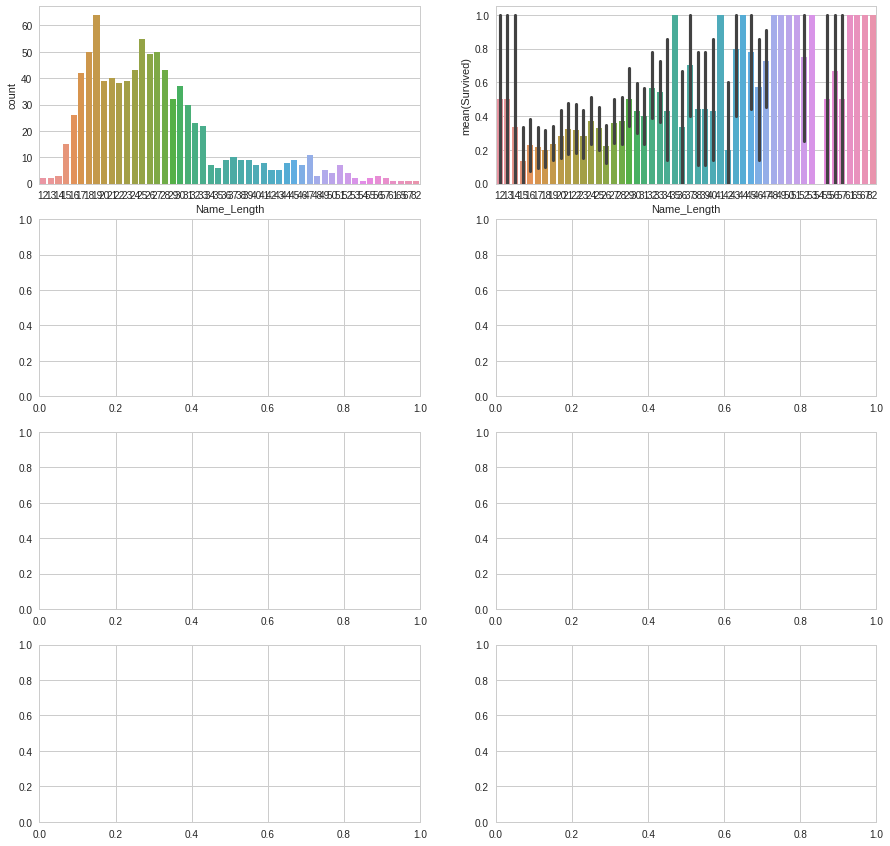

In [89]:
# Vrack v1 a faire marcher
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6),(axis7,axis8)) = plt.subplots(4,2,figsize=(15,15))

# Plot Name_Length
sns.countplot(x='Name_Length', data=df_train, ax=axis1)

# Plot Name_Length by mean of survival
sns.barplot(x='Name_Length', y='Survived', data=df_train, ax=axis2)

# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis3)

# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis4)

# Plot Title aggregate
sns.barplot(x='Title_aggr', data=df_train, ax=axis5)

# Display Title aggregate by mean of survival
sns.barplot(x='Title_aggr',y='Survived', data=df_train, ax=axis6)

# Display Title aggregate and Name Size by mean of survival
sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train, ax=axis7)

# Display Title aggregate and Name Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train, ax=axis8)

In [ ]:
# Vrack v2 a faire marcher
fig = plt.figure(figsize=(15, 5))
fig=sns.countplot(x='Name_Length', data=df_train)

fig=sns.barplot(x='Name_Length', y='Survived', data=df_train)

sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"])

# Display aggregate title by survived probability
fig1 = plt.figure(figsize=(15, 5))
fig1=sns.barplot(x='Title_aggr',y='Survived', data=df_train)

# Display aggregate title and Name Size by survived probability
fig2 = plt.figure(figsize=(15, 5))
fig2=sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train)

# Display aggregate title and Name Size by survived probability
fig3 = plt.figure(figsize=(15, 5))
fig3=sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train)

#### Visualization Family

In [ ]:
# A afficher correctrement
fig1 = plt.figure(figsize=(15, 5))
fig1 = sns.countplot(x='Number_of_relatives', data=df_train)

fig2 = plt.figure(figsize=(15, 5))
fig2 = sns.barplot(x='Number_of_relatives',y='Survived', data=df_train)

sns.barplot(x='Size_Family',y='Survived', data=df_train, order=['Alone', 'Small', 'Big'])

# Number_of_relatives with Pclass, Sex, Embarked by mean of survival
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Number_of_relatives',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Embarked', data=df_train, ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

# Size_Family with Pclass, Sex, Embarked by mean of survival
fig8, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Size_Family',y='Survived',hue='Pclass', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis1,)
sns.barplot(x='Size_Family',y='Survived',hue='Sex', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis2)
sns.barplot(x='Size_Family',y='Survived',hue='Embarked', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis3)
fig8.suptitle("Cross Representation of the features linked to the target : Survived")

### Features Encoding

In [281]:
display(combined.columns)
display(combined.isnull().sum())
display(combined.shape)
display(combined[["Embarked","Sex","Title_aggr","Size_Family","Name_Size","Pclass"]].head())

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Name_Length',
       'Name_Size', 'Title', 'Title_aggr', 'Number_of_relatives',
       'Size_Family'],
      dtype='object')

Age                    0   
Cabin                  1014
Embarked               0   
Fare                   0   
Name                   0   
Parch                  0   
PassengerId            0   
Pclass                 0   
Sex                    0   
SibSp                  0   
Survived               418 
Ticket                 0   
Name_Length            0   
Name_Size              0   
Title                  0   
Title_aggr             0   
Number_of_relatives    0   
Size_Family            0   
dtype: int64

(1309, 18)

Embarked     Sex Title_aggr Size_Family Name_Size  Pclass
0  S        male    Mr         Small       Medium    3     
1  C        female  Mrs        Small       Long      1     
2  S        female  Miss       Alone       Medium    3     
3  S        female  Mrs        Small       Long      1     
4  S        male    Mr         Alone       Medium    3

#### Categorial features encoding

##### Label Encoding

In [282]:
from sklearn.preprocessing import LabelEncoder

# Dataframe with numerical categorical feature
combined_num_cat = pd.DataFrame()

# LabelEncoder
labelEnc = LabelEncoder()

# Columns to apply
cat_vars=["Embarked","Sex","Title_aggr","Size_Family","Name_Size"]

for col in cat_vars:
    labelEnc.fit(np.unique(list(combined[col].values)))
    combined_num_cat[col]=labelEnc.transform(combined[col].astype('str'))
    
labelEnc.fit(np.unique(list(combined["Pclass"].values)))
combined_num_cat["Pclass"]=labelEnc.transform(combined["Pclass"].astype('int'))

In [283]:
combined_num_cat.head()

Embarked  Sex  Title_aggr  Size_Family  Name_Size  Pclass
0  2         1    2           2            1          2     
1  0         0    3           2            0          0     
2  2         0    1           0            1          2     
3  2         0    3           2            0          0     
4  2         1    2           0            1          2

##### One Hot  Encoding

In [284]:
def one_hot(df_in, cols):
    df_out = pd.DataFrame()
    for each in cols:
        dummies = pd.get_dummies(df_in[each], prefix=each, drop_first=False)
        df_out = pd.concat([df_out, dummies], axis=1)
    return df_out

In [285]:
# Dataframe with binary categorical feature

# Columns to apply
cat_vars=['Embarked','Sex',"Title_aggr","Size_Family","Name_Size","Pclass"]
combined_One_Hot_Cat = one_hot(combined,cat_vars)

In [286]:
combined_One_Hot_Cat.head()

Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  \
0  0           0           1           0           1          
1  1           0           0           1           0          
2  0           0           1           1           0          
3  0           0           1           1           0          
4  0           0           1           0           1          

   Title_aggr_Master  Title_aggr_Miss  Title_aggr_Mr  Title_aggr_Mrs  \
0  0                  0                1              0                
1  0                  0                0              1                
2  0                  1                0              0                
3  0                  0                0              1                
4  0                  0                1              0                

   Title_aggr_Officer    ...     Size_Family_Alone  Size_Family_Big  \
0  0                     ...     0                  0                 
1  0                     ...     0                  0                 
2  0                     ...     1                  0                 
3  0                     ...     0                  0                 
4  0                     ...     1                  0                 

   Size_Family_Small  Name_Size_Short  Name_Size_Medium  Name_Size_Long  \
0  1                  0                1                 0                
1  1                  0                0                 1                
2  0                  0                1                 0                
3  1                  0                0                 1                
4  0                  0                1                 0                

   Name_Size_Very Long  Pclass_1  Pclass_2  Pclass_3  
0  0                    0         0         1         
1  0                    1         0         0         
2  0                    0         0         1         
3  0                    1         0         0         
4  0                    0         0         1         

[5 rows x 21 columns]

### Feature Scalling

In [287]:
combined[['Fare','Age','Name_Length','Number_of_relatives']].head()

Fare   Age  Name_Length  Number_of_relatives
0  7.2500   22.0  23           1                  
1  71.2833  38.0  51           1                  
2  7.9250   26.0  22           0                  
3  53.1000  35.0  44           1                  
4  8.0500   35.0  24           0

In [288]:
from sklearn import preprocessing

combined_num_std = pd.DataFrame(combined[['Fare','Age','Name_Length','Number_of_relatives']])

# StandardScaller process
std_scale = preprocessing.StandardScaler()
combined_num_std[['Fare','Age','Name_Length','Number_of_relatives']] = std_scale.fit_transform(combined[['Fare','Age','Name_Length','Number_of_relatives']].astype(float))

combined_num_std[['Fare','Age','Name_Length','Number_of_relatives']].head()

Fare       Age  Name_Length  Number_of_relatives
0 -0.503176 -0.541471 -0.434672     0.073352           
1  0.734809  0.648868  2.511806     0.073352           
2 -0.490126 -0.243886 -0.539904    -0.558346           
3  0.383263  0.425680  1.775186     0.073352           
4 -0.487709  0.425680 -0.329441    -0.558346

### Data Preparation

In [289]:
# Concat
combined_OH_Std = pd.concat([combined_num_std,combined_One_Hot_Cat],axis=1)
combined_Num_Std = pd.concat([combined_num_std,combined_num_cat],axis=1)

In [290]:
# Display shape
display(combined_OH_Std.shape)
display(combined_Num_Std.shape)

(1309, 25)

(1309, 10)

In [291]:
# Split into Train and Eval
Train_OH_Std, Eval_OH_Std, Target_OH_Std = recover_train_test_target(combined_OH_Std)
Train_Num_Std, Eval_Num_Std, Target_Num_Std = recover_train_test_target(combined_Num_Std)

In [292]:
# Display shape
display(Train_OH_Std.shape)
display(Eval_OH_Std.shape)
display(Target_OH_Std.shape)

(891, 25)

(418, 25)

(891,)

In [293]:
# Select Data
data = Train_OH_Std
test_data = Eval_OH_Std
target = Target_OH_Std
columns_name = list(Train_OH_Std)

# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

# Dataframe of prediction
Prediction = pd.DataFrame()

### Features Importance


#### Correlation - Numerical label

In [220]:
# Concant data and target
Features_with_target = pd.concat([Train_Num_Std,target],axis=1)
# Correlation with target
Corr = pd.DataFrame()
Corr['Corr'] = Features_with_target.corr()["Survived"]
Corr.sort_values('Corr',ascending=False,inplace=True)
display(Corr)
# A réfléchir au sens en regardant la formule de corr pour les catégories le numerical label ordinales et non ordinales

Corr
Survived             1.000000
Name_Length          0.332350
Fare                 0.257307
Size_Family          0.249714
Number_of_relatives  0.016639
Age                 -0.059594
Title_aggr          -0.062916
Embarked            -0.174199
Name_Size           -0.261576
Pclass              -0.338481
Sex                 -0.543351

#### Correlation - One Hot Encoder

In [221]:
# Concant data and target
Features_with_target = pd.concat([Train_OH_Std,target],axis=1)
# Correlation with target
Corr = pd.DataFrame()
Corr['Corr'] = Features_with_target.corr()["Survived"]
Corr.sort_values('Corr',ascending=False,inplace=True)
display(Corr)

Corr
Survived             1.000000
Sex_female           0.543351
Title_aggr_Mrs       0.344935
Title_aggr_Miss      0.332795
Name_Length          0.332350
Pclass_1             0.285904
Size_Family_Small    0.279855
Name_Size_Long       0.273448
Fare                 0.257307
Embarked_C           0.174718
Pclass_2             0.093349
Title_aggr_Master    0.085221
Name_Size_Very Long  0.085083
Title_aggr_Royalty   0.033391
Number_of_relatives  0.016639
Embarked_Q           0.003650
Name_Size_Medium    -0.000867
Title_aggr_Officer  -0.031316
Age                 -0.059594
Size_Family_Big     -0.125147
Embarked_S          -0.155660
Name_Size_Short     -0.193143
Size_Family_Alone   -0.203367
Pclass_3            -0.322308
Sex_male            -0.543351
Title_aggr_Mr       -0.549199

#### LDA

In [33]:
# LDA
# LDA with n = 2 solver svd --> score : 0.78947
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lda.fit(X_train, y_train)

y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

lda_acc = accuracy_score(y_test, y_test_pred_lda)
lda_cr= classification_report(y_test, y_test_pred_lda)
lda_cm = confusion_matrix(y_test, y_test_pred_lda)

lda_acc_train = accuracy_score(y_train, y_train_pred_lda)
lda_cr_train = classification_report(y_train, y_train_pred_lda)
lda_cm_train = confusion_matrix(y_train, y_train_pred_lda)

print("Training set")
print( "LDA Accuracy :", lda_acc_train)
print(lda_cr_train)
print("Confusion Matrix :\n",lda_cm_train)
#print('Explained variance ratio :',lda.explained_variance_ratio_)
print('Balance of classes',lda.priors_)

print("-----------------------------------------------------------------------------")
print("Testing set")
print( "LDA Accuracy :", lda_acc)
print(lda_cr)
print("Confusion Matrix :\n",lda_cm)
#print('Explained variance ratio :',lda.explained_variance_ratio_)
print('Balance of classes',lda.priors_)



Prediction['LDA'] = lda.predict(Eval_OH_Std)


Coef = pd.DataFrame()
Coef['Features'] = list(X_train.columns)
Coef['Coef'] = lda.coef_.transpose()
Coef.sort_values('Coef',ascending=False,inplace=True)
Coef

Training set
LDA Accuracy : 0.842696629213
             precision    recall  f1-score   support

          0       0.85      0.91      0.88       436
          1       0.84      0.74      0.78       276

avg / total       0.84      0.84      0.84       712

Confusion Matrix :
 [[396  40]
 [ 72 204]]
Balance of classes [ 0.61235955  0.38764045]
-----------------------------------------------------------------------------
Testing set
LDA Accuracy : 0.810055865922
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       113
          1       0.74      0.76      0.75        66

avg / total       0.81      0.81      0.81       179

Confusion Matrix :
 [[95 18]
 [16 50]]
Balance of classes [ 0.61235955  0.38764045]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Features      Coef
9     Title_aggr_Master  3.725954
7            Sex_female  1.678109
22             Pclass_1  1.428481
21  Name_Size_Very Long  1.096566
15    Size_Family_Alone  0.907183
20       Name_Size_Long  0.843399
17    Size_Family_Small  0.297384
3   Number_of_relatives  0.234446
4            Embarked_C  0.233428
10      Title_aggr_Miss  0.194445
5            Embarked_Q  0.163461
0                  Fare  0.099998
12       Title_aggr_Mrs  0.083369
2           Name_Length  0.022475
19     Name_Size_Medium -0.051189
23             Pclass_2 -0.069906
6            Embarked_S -0.245581
18      Name_Size_Short -0.308402
1                   Age -0.401911
14   Title_aggr_Royalty -0.516941
13   Title_aggr_Officer -0.934822
11        Title_aggr_Mr -0.983615
24             Pclass_3 -1.012883
8              Sex_male -1.678109
16      Size_Family_Big -4.150540

#### Features importance


In [ ]:
# From selectkbest
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import KFold
%matplotlib inline
import matplotlib.pyplot as plt
#predictors = ["Pclass", "Sex", "Age", "Fare",
 #             "FsizeD", "Embarked", "NlengthD","Deck","TicketNumber"]
predictors = ["Pclass", "Sex", "Age",
              "Fare","NlengthD", "FsizeD","NameLength","Deck","Embarked"]
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By SelectKBest")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

In [ ]:
# From Random Forest
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

### Model Selection

#### Helper function

In [294]:
# Helper function to analyse and get result

# Plot the confusion matrice 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Grid Score into a Pandas Dataframe
def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

# Helper function for gridseach
def grid_search_global(clas_reg, dict_pip, dict_param, class_names):

    dict_of_res={}
    dict_of_best={}
    df_results_global=pd.DataFrame()
    
    print ("Starting Gridsearch")
    
    for key in dict_param.keys():
        gs = GridSearchCV(dict_pip[key], dict_param[key], verbose=0, refit=True, n_jobs=-1, cv=5)
        gs = gs.fit(X_train, y_train)
        dict_of_res[key]=gs.grid_scores_
        
        print('\n-------------------------------------------------------------------------------------------------------')
        print ("Gridsearch for %s \n" % dict_param[key])
        print ("Best score :", gs.best_score_)
        print ("Best params :",gs.best_params_)
        dict_of_best[key]=[gs.best_score_,gs.best_params_]
        
        y_train_pred=gs.predict(X_train)
        y_test_pred=gs.predict(X_test)
        
        if (clas_reg=='clas'):
            
            # Classification report
            print('\nClassification report on training set')
            print(classification_report(y_train, y_train_pred))
            print('\nClassification report on testing set')
            print(classification_report(y_test, y_test_pred))
            
            # Compute confusion matrix
            #cnf_matrix = confusion_matrix(y_test, y_test_pred)
            #np.set_printoptions(precision=2)

            # Plot non-normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names,
            #                      title='Confusion matrix, without normalization')
            
            # Plot normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
            #                      title='Normalized confusion matrix')
            
            #plt.show()
        
        # Resultats deja présent dans : Grid Score #cv_results_ alégé
        #print('\nGrid Score #grid_scores_')
        #pprint(gs.grid_scores_)
        
        # Obtention des résultats avec selection et réarrangement des attributs puis stockage
        df_results=cv_results_to_df(gs.cv_results_)
        df_results['Algo']=key
        df_results=df_results[['Algo','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
        df_results_global=df_results_global.append(df_results)
        print("\nGrid Score #cv_results_ alégé")
        display(df_results)
        

        
    # Transformation de dict_of_best en dataframe
    df_best=pd.DataFrame.from_dict(dict_of_best,'index')
    df_best.columns=['Scores','Parameters']
    df_best.sort_values('Scores',ascending=False,inplace=True)  

    print('\n -------------------------------------------------------------------------------------------------------')
    print('\nList of best score and parameters by pipeline')
    display(df_best)
    print('\nSummary')
    display(df_results_global)
    print ("Gridsearch Finished")
    print('\n -------------------------------------------------------------------------------------------------------')    
    return df_best, dict_of_best, df_results_global


"""
========================
Plotting Learning Curves
========================
On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(0.7, 1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target


#title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

#estimator = GaussianNB()
#plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

#plt.show()


import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, estimator_name, param_name, param_range, X, y, cv,
    scoring='accuracy', scale='classic' , n_jobs=-1):
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    title_fig='Validation Curve with %s' % estimator_name
    plt.title(title_fig)
    plt.xlabel(param_name)
    plt.ylabel("Score : %s" % scoring)
    plt.ylim(0.7, 1)
    lw = 2
    
    if (scale=='semilog'):
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    else :
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw) 

    plt.legend(loc="best")
    plt.show()
    





Plotting Learning Curves
On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.



### Multipes Algo

In [ ]:
# Pipeline setup
models = { 
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'RandomForestClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'GradientBoostingClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

### Gradient Boosting Classifier

In [232]:
# Pipeline setup
models = { 
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

# Parameters setup
params = {
    'GradientBoostingClassifier': { 'n_estimators': [ 5,10,15,20,25,30,35,40], 
                                   'learning_rate': [0.01,0.03,0.1,0.2,0.3],
                                  'loss' : ['deviance','exponential'],
                                  'max_depth' : [2,3,4] 
                                  }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch

-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40], 'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3], 'loss': ['deviance', 'exponential'], 'max_depth': [2, 3, 4]} 

Best score : 0.839887640449
Best params : {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 20}

Classification report on training set
             precision    recall  f1-score   support

          0       0.86      0.90      0.88       432
          1       0.84      0.77      0.80       280

avg / total       0.85      0.85      0.85       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.86      0.87      0.87       117
          1       0.75      0.74      0.75        62

avg / total       0.83      0.83      0.83       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  \
225  GradientBoostingClassifier  0.839888         0.026750         
107  GradientBoostingClassifier  0.839888         0.027673         
177  GradientBoostingClassifier  0.838483         0.028953         
201  GradientBoostingClassifier  0.838483         0.025771         
130  GradientBoostingClassifier  0.838483         0.026454         
106  GradientBoostingClassifier  0.838483         0.026454         
63   GradientBoostingClassifier  0.837079         0.025488         
87   GradientBoostingClassifier  0.837079         0.022192         
109  GradientBoostingClassifier  0.837079         0.028391         
143  GradientBoostingClassifier  0.837079         0.030089         
223  GradientBoostingClassifier  0.837079         0.022360         
164  GradientBoostingClassifier  0.837079         0.029424         
86   GradientBoostingClassifier  0.835674         0.021405         
111  GradientBoostingClassifier  0.835674         0.027491         
110  GradientBoostingClassifier  0.835674         0.032087         
156  GradientBoostingClassifier  0.835674         0.036908         
131  GradientBoostingClassifier  0.834270         0.028489         
163  GradientBoostingClassifier  0.834270         0.025075         
202  GradientBoostingClassifier  0.834270         0.026414         
142  GradientBoostingClassifier  0.834270         0.029141         
204  GradientBoostingClassifier  0.834270         0.043446         
187  GradientBoostingClassifier  0.834270         0.028411         
141  GradientBoostingClassifier  0.832865         0.026934         
132  GradientBoostingClassifier  0.832865         0.027756         
166  GradientBoostingClassifier  0.832865         0.034357         
135  GradientBoostingClassifier  0.832865         0.029610         
133  GradientBoostingClassifier  0.832865         0.026043         
162  GradientBoostingClassifier  0.832865         0.028578         
161  GradientBoostingClassifier  0.832865         0.029158         
200  GradientBoostingClassifier  0.832865         0.020682         
..                          ...       ...              ...         
11   GradientBoostingClassifier  0.693820         0.107719         
28   GradientBoostingClassifier  0.634831         0.055739         
17   GradientBoostingClassifier  0.606742         0.001352         
18   GradientBoostingClassifier  0.606742         0.001352         
1    GradientBoostingClassifier  0.606742         0.001352         
16   GradientBoostingClassifier  0.606742         0.001352         
10   GradientBoostingClassifier  0.606742         0.001352         
9    GradientBoostingClassifier  0.606742         0.001352         
8    GradientBoostingClassifier  0.606742         0.001352         
25   GradientBoostingClassifier  0.606742         0.001352         
3    GradientBoostingClassifier  0.606742         0.001352         
2    GradientBoostingClassifier  0.606742         0.001352         
24   GradientBoostingClassifier  0.606742         0.001352         
32   GradientBoostingClassifier  0.606742         0.001352         
26   GradientBoostingClassifier  0.606742         0.001352         
27   GradientBoostingClassifier  0.606742         0.001352         
33   GradientBoostingClassifier  0.606742         0.001352         
34   GradientBoostingClassifier  0.606742         0.001352         
35   GradientBoostingClassifier  0.606742         0.001352         
40   GradientBoostingClassifier  0.606742         0.001352         
41   GradientBoostingClassifier  0.606742         0.001352         
42   GradientBoostingClassifier  0.606742         0.001352         
43   GradientBoostingClassifier  0.606742         0.001352         
48   GradientBoostingClassifier  0.606742         0.001352         
56   GradientBoostingClassifier  0.606742         0.001352         
64   GradientBoostingClassifier  0.606742         0.001352         
72   GradientBoostingClassifier  0.606742         0.001352         
80   GradientBo


 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


Scores  \
GradientBoostingClassifier  0.839888   

                                                                                                Parameters  
GradientBoostingClassifier  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 20}


Summary


Algo  mean_test_score  std_test_score  \
225  GradientBoostingClassifier  0.839888         0.026750         
107  GradientBoostingClassifier  0.839888         0.027673         
177  GradientBoostingClassifier  0.838483         0.028953         
201  GradientBoostingClassifier  0.838483         0.025771         
130  GradientBoostingClassifier  0.838483         0.026454         
106  GradientBoostingClassifier  0.838483         0.026454         
63   GradientBoostingClassifier  0.837079         0.025488         
87   GradientBoostingClassifier  0.837079         0.022192         
109  GradientBoostingClassifier  0.837079         0.028391         
143  GradientBoostingClassifier  0.837079         0.030089         
223  GradientBoostingClassifier  0.837079         0.022360         
164  GradientBoostingClassifier  0.837079         0.029424         
86   GradientBoostingClassifier  0.835674         0.021405         
111  GradientBoostingClassifier  0.835674         0.027491         
110  GradientBoostingClassifier  0.835674         0.032087         
156  GradientBoostingClassifier  0.835674         0.036908         
131  GradientBoostingClassifier  0.834270         0.028489         
163  GradientBoostingClassifier  0.834270         0.025075         
202  GradientBoostingClassifier  0.834270         0.026414         
142  GradientBoostingClassifier  0.834270         0.029141         
204  GradientBoostingClassifier  0.834270         0.043446         
187  GradientBoostingClassifier  0.834270         0.028411         
141  GradientBoostingClassifier  0.832865         0.026934         
132  GradientBoostingClassifier  0.832865         0.027756         
166  GradientBoostingClassifier  0.832865         0.034357         
135  GradientBoostingClassifier  0.832865         0.029610         
133  GradientBoostingClassifier  0.832865         0.026043         
162  GradientBoostingClassifier  0.832865         0.028578         
161  GradientBoostingClassifier  0.832865         0.029158         
200  GradientBoostingClassifier  0.832865         0.020682         
..                          ...       ...              ...         
11   GradientBoostingClassifier  0.693820         0.107719         
28   GradientBoostingClassifier  0.634831         0.055739         
17   GradientBoostingClassifier  0.606742         0.001352         
18   GradientBoostingClassifier  0.606742         0.001352         
1    GradientBoostingClassifier  0.606742         0.001352         
16   GradientBoostingClassifier  0.606742         0.001352         
10   GradientBoostingClassifier  0.606742         0.001352         
9    GradientBoostingClassifier  0.606742         0.001352         
8    GradientBoostingClassifier  0.606742         0.001352         
25   GradientBoostingClassifier  0.606742         0.001352         
3    GradientBoostingClassifier  0.606742         0.001352         
2    GradientBoostingClassifier  0.606742         0.001352         
24   GradientBoostingClassifier  0.606742         0.001352         
32   GradientBoostingClassifier  0.606742         0.001352         
26   GradientBoostingClassifier  0.606742         0.001352         
27   GradientBoostingClassifier  0.606742         0.001352         
33   GradientBoostingClassifier  0.606742         0.001352         
34   GradientBoostingClassifier  0.606742         0.001352         
35   GradientBoostingClassifier  0.606742         0.001352         
40   GradientBoostingClassifier  0.606742         0.001352         
41   GradientBoostingClassifier  0.606742         0.001352         
42   GradientBoostingClassifier  0.606742         0.001352         
43   GradientBoostingClassifier  0.606742         0.001352         
48   GradientBoostingClassifier  0.606742         0.001352         
56   GradientBoostingClassifier  0.606742         0.001352         
64   GradientBoostingClassifier  0.606742         0.001352         
72   GradientBoostingClassifier  0.606742         0.001352         
80   GradientBo

Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


In [233]:
# Results dataframe
d_res

Algo  mean_test_score  std_test_score  \
225  GradientBoostingClassifier  0.839888         0.026750         
107  GradientBoostingClassifier  0.839888         0.027673         
177  GradientBoostingClassifier  0.838483         0.028953         
201  GradientBoostingClassifier  0.838483         0.025771         
130  GradientBoostingClassifier  0.838483         0.026454         
106  GradientBoostingClassifier  0.838483         0.026454         
63   GradientBoostingClassifier  0.837079         0.025488         
87   GradientBoostingClassifier  0.837079         0.022192         
109  GradientBoostingClassifier  0.837079         0.028391         
143  GradientBoostingClassifier  0.837079         0.030089         
223  GradientBoostingClassifier  0.837079         0.022360         
164  GradientBoostingClassifier  0.837079         0.029424         
86   GradientBoostingClassifier  0.835674         0.021405         
111  GradientBoostingClassifier  0.835674         0.027491         
110  GradientBoostingClassifier  0.835674         0.032087         
156  GradientBoostingClassifier  0.835674         0.036908         
131  GradientBoostingClassifier  0.834270         0.028489         
163  GradientBoostingClassifier  0.834270         0.025075         
202  GradientBoostingClassifier  0.834270         0.026414         
142  GradientBoostingClassifier  0.834270         0.029141         
204  GradientBoostingClassifier  0.834270         0.043446         
187  GradientBoostingClassifier  0.834270         0.028411         
141  GradientBoostingClassifier  0.832865         0.026934         
132  GradientBoostingClassifier  0.832865         0.027756         
166  GradientBoostingClassifier  0.832865         0.034357         
135  GradientBoostingClassifier  0.832865         0.029610         
133  GradientBoostingClassifier  0.832865         0.026043         
162  GradientBoostingClassifier  0.832865         0.028578         
161  GradientBoostingClassifier  0.832865         0.029158         
200  GradientBoostingClassifier  0.832865         0.020682         
..                          ...       ...              ...         
11   GradientBoostingClassifier  0.693820         0.107719         
28   GradientBoostingClassifier  0.634831         0.055739         
17   GradientBoostingClassifier  0.606742         0.001352         
18   GradientBoostingClassifier  0.606742         0.001352         
1    GradientBoostingClassifier  0.606742         0.001352         
16   GradientBoostingClassifier  0.606742         0.001352         
10   GradientBoostingClassifier  0.606742         0.001352         
9    GradientBoostingClassifier  0.606742         0.001352         
8    GradientBoostingClassifier  0.606742         0.001352         
25   GradientBoostingClassifier  0.606742         0.001352         
3    GradientBoostingClassifier  0.606742         0.001352         
2    GradientBoostingClassifier  0.606742         0.001352         
24   GradientBoostingClassifier  0.606742         0.001352         
32   GradientBoostingClassifier  0.606742         0.001352         
26   GradientBoostingClassifier  0.606742         0.001352         
27   GradientBoostingClassifier  0.606742         0.001352         
33   GradientBoostingClassifier  0.606742         0.001352         
34   GradientBoostingClassifier  0.606742         0.001352         
35   GradientBoostingClassifier  0.606742         0.001352         
40   GradientBoostingClassifier  0.606742         0.001352         
41   GradientBoostingClassifier  0.606742         0.001352         
42   GradientBoostingClassifier  0.606742         0.001352         
43   GradientBoostingClassifier  0.606742         0.001352         
48   GradientBoostingClassifier  0.606742         0.001352         
56   GradientBoostingClassifier  0.606742         0.001352         
64   GradientBoostingClassifier  0.606742         0.001352         
72   GradientBoostingClassifier  0.606742         0.001352         
80   GradientBo

In [234]:
# Selection of the parameters to study
index_selection = [177,130,106,63,87,86]
df_study = d_res.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
df_study

Algo  \
177  GradientBoostingClassifier   
130  GradientBoostingClassifier   
106  GradientBoostingClassifier   
63   GradientBoostingClassifier   
87   GradientBoostingClassifier   
86   GradientBoostingClassifier   

                                                                                 params  \
177  {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 10}    
130  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 15}    
106  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}       
63   {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 40}      
87   {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}   
86   {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 35}   

     mean_test_score  mean_train_score  
177  0.838483         0.858846          
130  0.838483         0.857445          
106  0.838483         0.854283          
63   0.837079         0.852176          
87   0.837079         0.851823          
86   0.835674         0.849717

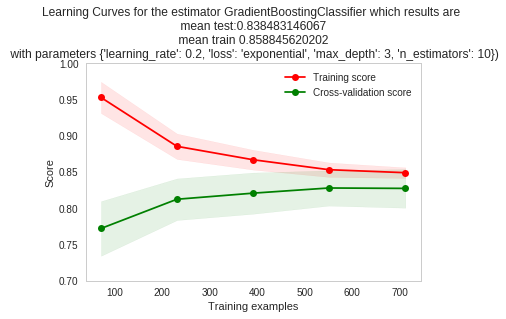

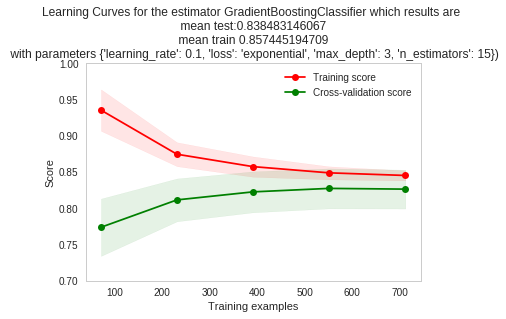

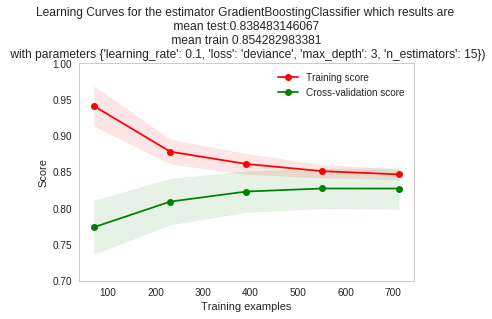

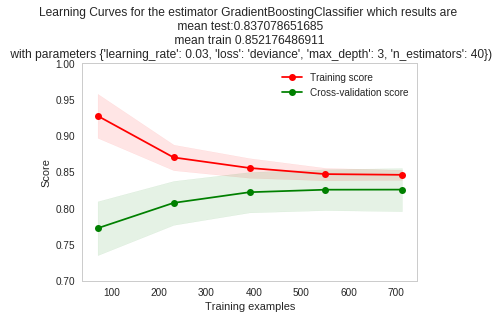

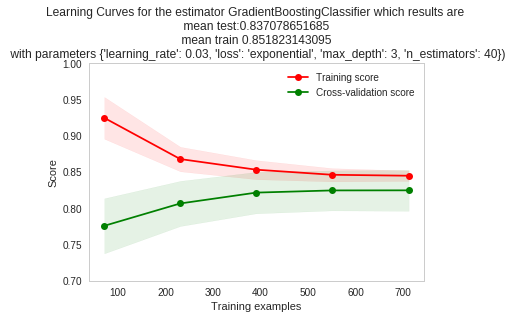

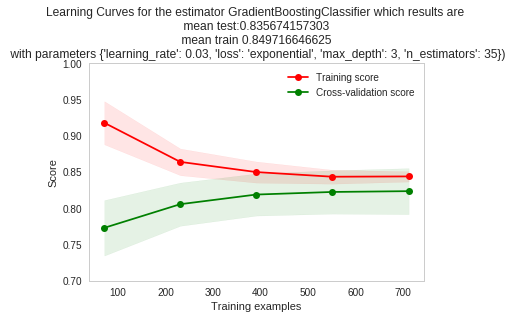

In [244]:
# Learning curve
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.858845620202
Params: {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 10}


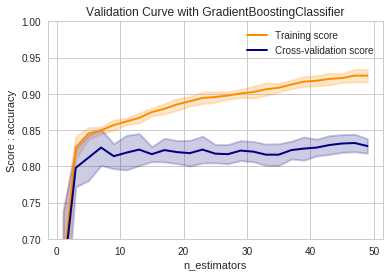

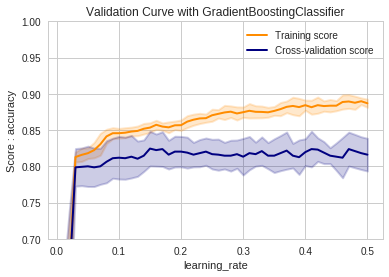

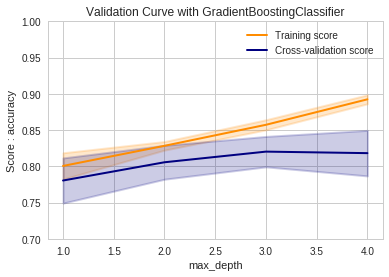

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.857445194709
Params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 15}


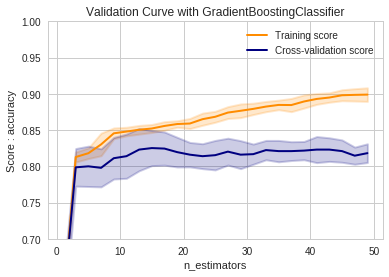

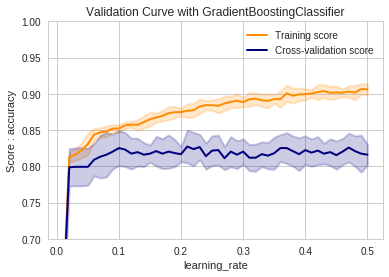

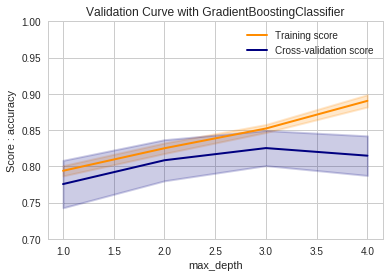

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.854282983381
Params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}


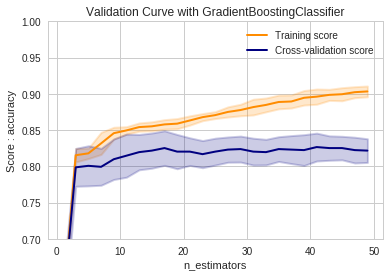

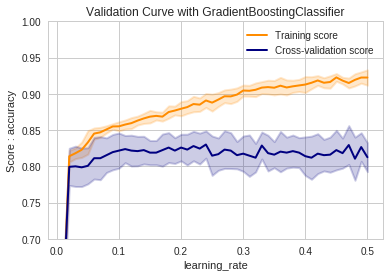

Model: GradientBoostingClassifier
Mean test: 0.837078651685
Mean train: 0.852176486911
Params: {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 40}


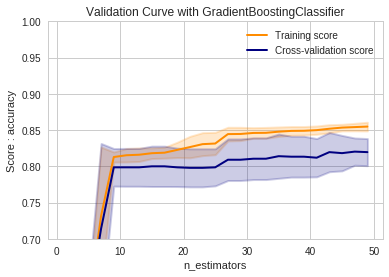

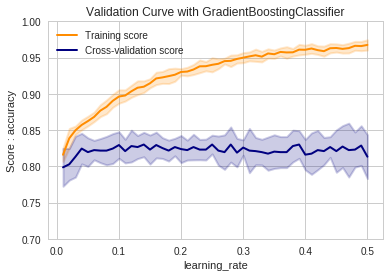

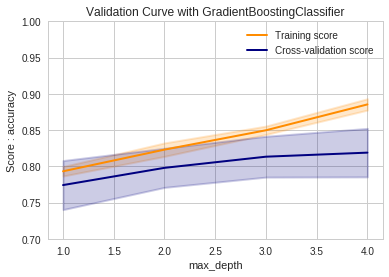

Model: GradientBoostingClassifier
Mean test: 0.837078651685
Mean train: 0.851823143095
Params: {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}


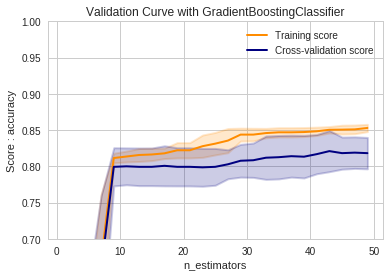

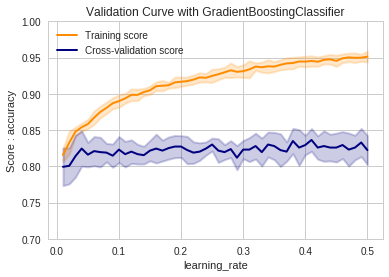

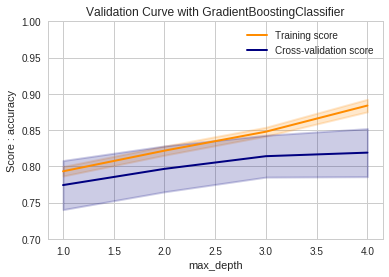

Model: GradientBoostingClassifier
Mean test: 0.835674157303
Mean train: 0.849716646625
Params: {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 35}


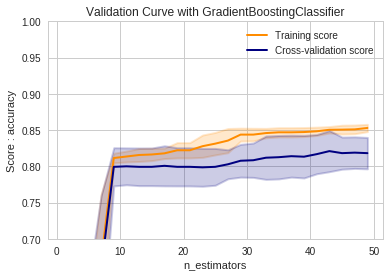

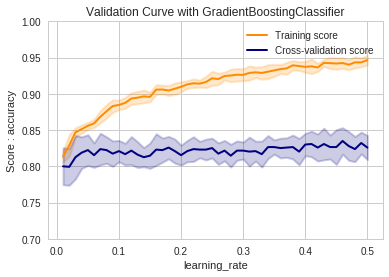

In [248]:
# Validation parameters setup
dict_Validation = { 
    'GradientBoostingClassifier': {'n_estimators': range(1,50,2),
                                  'learning_rate': np.linspace(0.01,0.5,50),
                                  'max_depth': range(1,5,1)}  
}

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, clef, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [249]:
# Prediction 
GBC_params = {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}
gbc = GradientBoostingClassifier(**GBC_params)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(test_data)
Prediction['GBC'] = gbc_pred

### Random Forest Classifier

In [ ]:
# Pipeline setup
models = { 
    'RandomForestClassifier': RandomForestClassifier(),
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'RandomForestClassifier': { 'n_estimators': [5, 10, 20, 30, 40, 50 ,100, 500 ],
                               'criterion' : ['gini','entropy'],
                               'max_features':['sqrt','log2',2,4,8,12,14,18,22],
                               'min_samples_split': [2,3,5,6,8,10],
                               'min_samples_leaf':  [1,3,5,7,8,10]
                              }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

In [233]:
# Results dataframe
d_res

Algo  mean_test_score  std_test_score  \
225  GradientBoostingClassifier  0.839888         0.026750         
107  GradientBoostingClassifier  0.839888         0.027673         
177  GradientBoostingClassifier  0.838483         0.028953         
201  GradientBoostingClassifier  0.838483         0.025771         
130  GradientBoostingClassifier  0.838483         0.026454         
106  GradientBoostingClassifier  0.838483         0.026454         
63   GradientBoostingClassifier  0.837079         0.025488         
87   GradientBoostingClassifier  0.837079         0.022192         
109  GradientBoostingClassifier  0.837079         0.028391         
143  GradientBoostingClassifier  0.837079         0.030089         
223  GradientBoostingClassifier  0.837079         0.022360         
164  GradientBoostingClassifier  0.837079         0.029424         
86   GradientBoostingClassifier  0.835674         0.021405         
111  GradientBoostingClassifier  0.835674         0.027491         
110  GradientBoostingClassifier  0.835674         0.032087         
156  GradientBoostingClassifier  0.835674         0.036908         
131  GradientBoostingClassifier  0.834270         0.028489         
163  GradientBoostingClassifier  0.834270         0.025075         
202  GradientBoostingClassifier  0.834270         0.026414         
142  GradientBoostingClassifier  0.834270         0.029141         
204  GradientBoostingClassifier  0.834270         0.043446         
187  GradientBoostingClassifier  0.834270         0.028411         
141  GradientBoostingClassifier  0.832865         0.026934         
132  GradientBoostingClassifier  0.832865         0.027756         
166  GradientBoostingClassifier  0.832865         0.034357         
135  GradientBoostingClassifier  0.832865         0.029610         
133  GradientBoostingClassifier  0.832865         0.026043         
162  GradientBoostingClassifier  0.832865         0.028578         
161  GradientBoostingClassifier  0.832865         0.029158         
200  GradientBoostingClassifier  0.832865         0.020682         
..                          ...       ...              ...         
11   GradientBoostingClassifier  0.693820         0.107719         
28   GradientBoostingClassifier  0.634831         0.055739         
17   GradientBoostingClassifier  0.606742         0.001352         
18   GradientBoostingClassifier  0.606742         0.001352         
1    GradientBoostingClassifier  0.606742         0.001352         
16   GradientBoostingClassifier  0.606742         0.001352         
10   GradientBoostingClassifier  0.606742         0.001352         
9    GradientBoostingClassifier  0.606742         0.001352         
8    GradientBoostingClassifier  0.606742         0.001352         
25   GradientBoostingClassifier  0.606742         0.001352         
3    GradientBoostingClassifier  0.606742         0.001352         
2    GradientBoostingClassifier  0.606742         0.001352         
24   GradientBoostingClassifier  0.606742         0.001352         
32   GradientBoostingClassifier  0.606742         0.001352         
26   GradientBoostingClassifier  0.606742         0.001352         
27   GradientBoostingClassifier  0.606742         0.001352         
33   GradientBoostingClassifier  0.606742         0.001352         
34   GradientBoostingClassifier  0.606742         0.001352         
35   GradientBoostingClassifier  0.606742         0.001352         
40   GradientBoostingClassifier  0.606742         0.001352         
41   GradientBoostingClassifier  0.606742         0.001352         
42   GradientBoostingClassifier  0.606742         0.001352         
43   GradientBoostingClassifier  0.606742         0.001352         
48   GradientBoostingClassifier  0.606742         0.001352         
56   GradientBoostingClassifier  0.606742         0.001352         
64   GradientBoostingClassifier  0.606742         0.001352         
72   GradientBoostingClassifier  0.606742         0.001352         
80   GradientBo

In [234]:
# Selection of the parameters to study
index_selection = [177,130,106,63,87,86]
df_study = d_res.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
df_study

Algo  \
177  GradientBoostingClassifier   
130  GradientBoostingClassifier   
106  GradientBoostingClassifier   
63   GradientBoostingClassifier   
87   GradientBoostingClassifier   
86   GradientBoostingClassifier   

                                                                                 params  \
177  {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 10}    
130  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 15}    
106  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}       
63   {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 40}      
87   {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}   
86   {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 35}   

     mean_test_score  mean_train_score  
177  0.838483         0.858846          
130  0.838483         0.857445          
106  0.838483         0.854283          
63   0.837079         0.852176          
87   0.837079         0.851823          
86   0.835674         0.849717

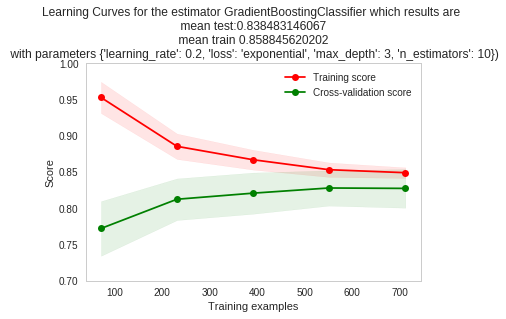

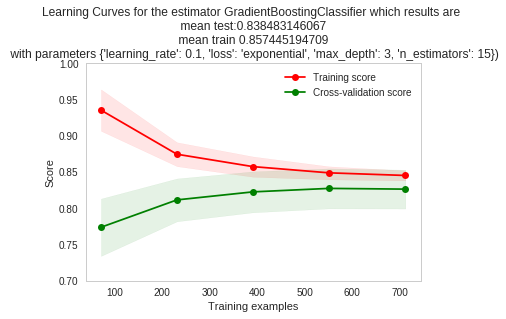

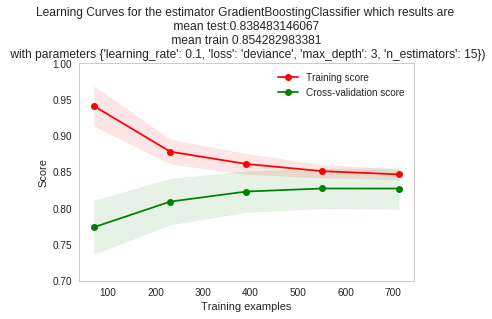

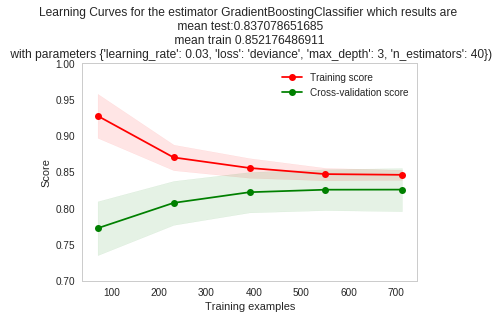

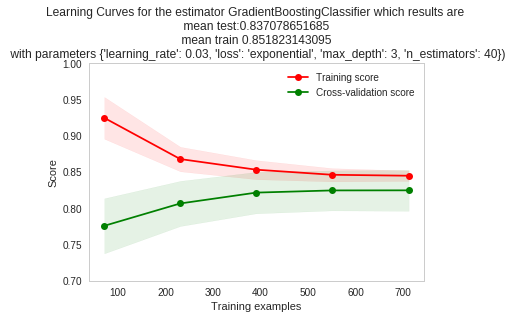

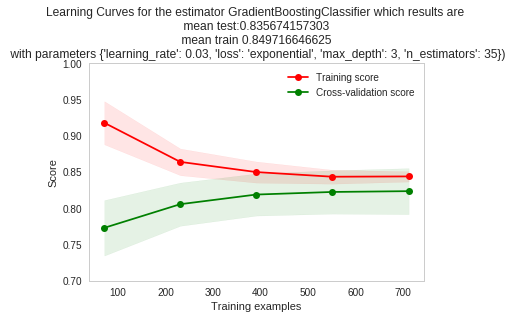

In [244]:
# Learning curve
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.858845620202
Params: {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 10}


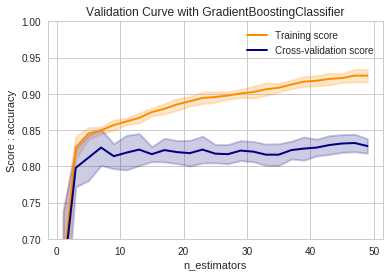

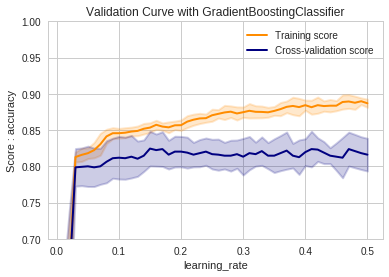

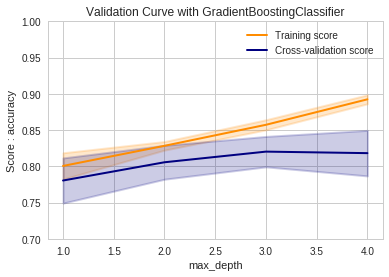

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.857445194709
Params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 15}


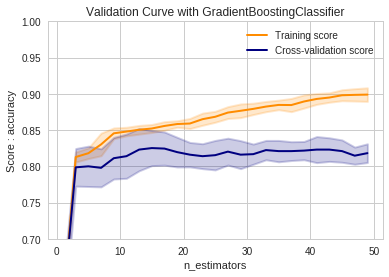

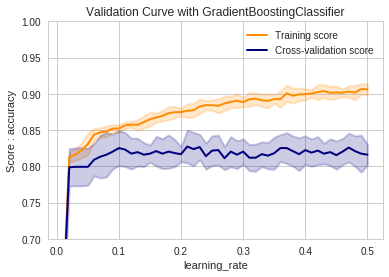

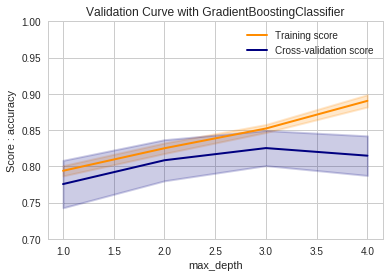

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.854282983381
Params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}


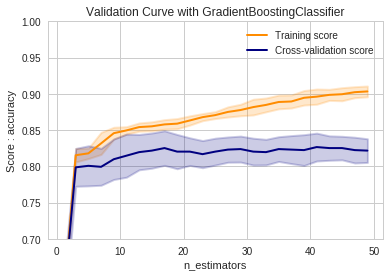

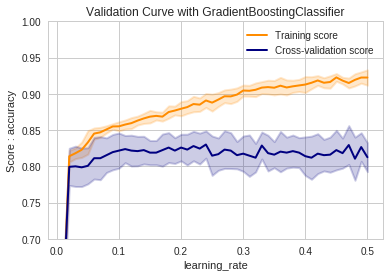

Model: GradientBoostingClassifier
Mean test: 0.837078651685
Mean train: 0.852176486911
Params: {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 40}


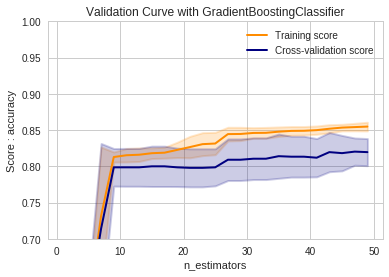

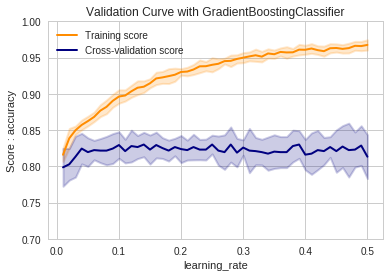

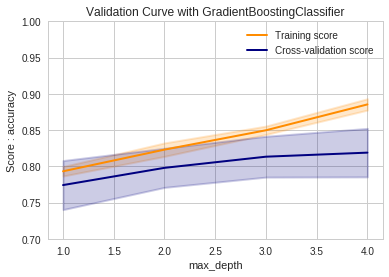

Model: GradientBoostingClassifier
Mean test: 0.837078651685
Mean train: 0.851823143095
Params: {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}


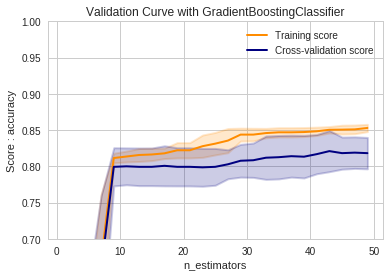

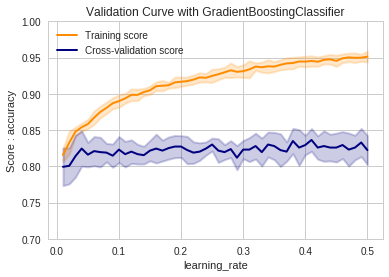

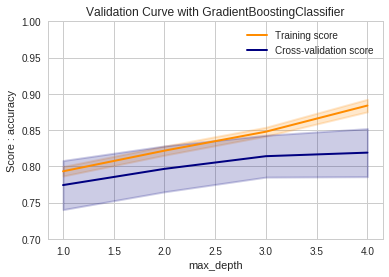

Model: GradientBoostingClassifier
Mean test: 0.835674157303
Mean train: 0.849716646625
Params: {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 35}


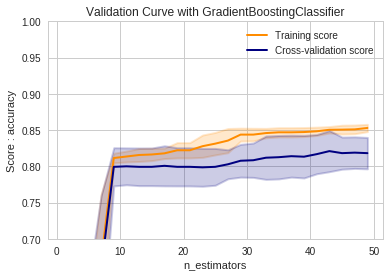

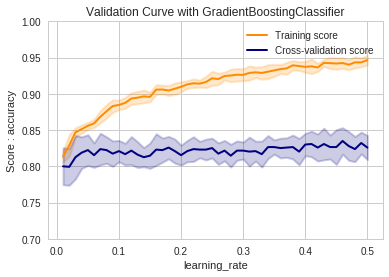

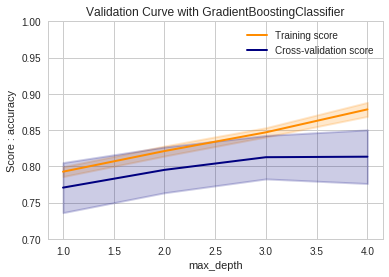

In [248]:
# Validation parameters setup
dict_Validation = { 
    'RandomForestClassifier': {'n_estimators': range(1,50,2),
                                  'learning_rate': np.linspace(0.01,0.5,50),
                                  'max_depth': range(1,5,1)}  
}

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, clef, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [249]:
# Prediction 
RF_params = {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}
rf = GradientBoostingClassifier(**GBC_params)
rf.fit(X_train,y_train)
rf_pred = rf.predict(test_data)
Prediction['RF'] = rf_pred

### Adaboost

In [ ]:
# Pipeline setup
models = { 
    'AdaBoostClassifier': AdaBoostClassifier(),
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'AdaBoostClassifier': { 'n_estimators': [5, 10, 20, 30, 40, 50 ,100, 500 ],
                               'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                              }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

### SVC

In [295]:
# Pipeline setup
models = { 
    'SVC': SVC()
}

# Parameters setup
params = {
    'SVC': [
        {'kernel': ['poly'], 'C': [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
                            'gamma': [0.08,0.09,0.1,0.11,0.12],
                            'degree': [2,3]}]}

# Lancer la grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch

-------------------------------------------------------------------------------------------------------
Gridsearch for [{'kernel': ['poly'], 'C': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'gamma': [0.08, 0.09, 0.1, 0.11, 0.12], 'degree': [2, 3]}] 

Best score : 0.839887640449
Best params : {'C': 0.8, 'degree': 2, 'gamma': 0.09, 'kernel': 'poly'}

Classification report on training set
             precision    recall  f1-score   support

          0       0.85      0.90      0.88       438
          1       0.83      0.74      0.78       274

avg / total       0.84      0.84      0.84       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.86      0.86      0.86       111
          1       0.77      0.78      0.77        68

avg / total       0.83      0.83      0.83       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  mean_train_score  std_train_score  \
51  SVC  0.839888         0.027863        0.840939          0.006290          
65  SVC  0.839888         0.028628        0.843750          0.006069          
70  SVC  0.839888         0.027863        0.840939          0.006290          
0   SVC  0.838483         0.026230        0.839537          0.006333          
1   SVC  0.838483         0.026230        0.839537          0.006333          
27  SVC  0.838483         0.027041        0.844805          0.005895          
72  SVC  0.838483         0.027074        0.843046          0.005978          
30  SVC  0.838483         0.026230        0.839886          0.005648          
62  SVC  0.838483         0.027074        0.842695          0.006290          
32  SVC  0.838483         0.026230        0.840939          0.006290          
33  SVC  0.838483         0.029806        0.840939          0.006290          
34  SVC  0.838483         0.027074        0.842695          0.006290          
36  SVC  0.838483         0.027041        0.843750          0.006069          
42  SVC  0.838483         0.029806        0.840939          0.006290          
41  SVC  0.838483         0.026230        0.840587          0.006662          
25  SVC  0.838483         0.029806        0.842695          0.006177          
43  SVC  0.838483         0.027074        0.841992          0.006995          
44  SVC  0.838483         0.027074        0.843046          0.005978          
46  SVC  0.838483         0.027041        0.845155          0.005576          
52  SVC  0.838483         0.029806        0.841992          0.006995          
53  SVC  0.838483         0.027074        0.843046          0.005978          
54  SVC  0.838483         0.027074        0.843046          0.005978          
63  SVC  0.838483         0.027074        0.843046          0.005978          
60  SVC  0.838483         0.026230        0.840587          0.006662          
73  SVC  0.838483         0.027074        0.843046          0.005978          
71  SVC  0.838483         0.029806        0.841992          0.006995          
24  SVC  0.838483         0.029806        0.840939          0.006290          
15  SVC  0.838483         0.029806        0.841292          0.005737          
2   SVC  0.838483         0.026230        0.839185          0.005940          
3   SVC  0.838483         0.026230        0.839886          0.005648          
..  ...       ...              ...             ...               ...          
37  SVC  0.837079         0.026153        0.845505          0.005330          
77  SVC  0.837079         0.026418        0.851118          0.005289          
16  SVC  0.837079         0.028215        0.842695          0.006177          
47  SVC  0.837079         0.026153        0.846907          0.005570          
19  SVC  0.837079         0.026153        0.846907          0.005570          
76  SVC  0.837079         0.026153        0.846907          0.005570          
35  SVC  0.837079         0.028215        0.843047          0.005964          
39  SVC  0.837079         0.026418        0.851821          0.004672          
66  SVC  0.837079         0.026153        0.845856          0.005169          
78  SVC  0.835674         0.025547        0.858492          0.004800          
67  SVC  0.835674         0.025430        0.849713          0.005450          
68  SVC  0.835674         0.028424        0.854986          0.001408          
40  SVC  0.835674         0.026824        0.839185          0.005301          
31  SVC  0.835674         0.026824        0.839535          0.005753          
13  SVC  0.835674         0.026824        0.839535          0.005753          
50  SVC  0.835674         0.026824        0.839886          0.005648          
49  SVC  0.835674         0.028424        0.855336          0.001494          
48  SVC  0.835674         0.025430        0.850064          0.005209          
45  SVC  0.835674         0.029609        0.843750   


 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


Scores                                                Parameters
SVC  0.839888  {'C': 0.8, 'degree': 2, 'gamma': 0.09, 'kernel': 'poly'}


Summary


Algo  mean_test_score  std_test_score  mean_train_score  std_train_score  \
51  SVC  0.839888         0.027863        0.840939          0.006290          
65  SVC  0.839888         0.028628        0.843750          0.006069          
70  SVC  0.839888         0.027863        0.840939          0.006290          
0   SVC  0.838483         0.026230        0.839537          0.006333          
1   SVC  0.838483         0.026230        0.839537          0.006333          
27  SVC  0.838483         0.027041        0.844805          0.005895          
72  SVC  0.838483         0.027074        0.843046          0.005978          
30  SVC  0.838483         0.026230        0.839886          0.005648          
62  SVC  0.838483         0.027074        0.842695          0.006290          
32  SVC  0.838483         0.026230        0.840939          0.006290          
33  SVC  0.838483         0.029806        0.840939          0.006290          
34  SVC  0.838483         0.027074        0.842695          0.006290          
36  SVC  0.838483         0.027041        0.843750          0.006069          
42  SVC  0.838483         0.029806        0.840939          0.006290          
41  SVC  0.838483         0.026230        0.840587          0.006662          
25  SVC  0.838483         0.029806        0.842695          0.006177          
43  SVC  0.838483         0.027074        0.841992          0.006995          
44  SVC  0.838483         0.027074        0.843046          0.005978          
46  SVC  0.838483         0.027041        0.845155          0.005576          
52  SVC  0.838483         0.029806        0.841992          0.006995          
53  SVC  0.838483         0.027074        0.843046          0.005978          
54  SVC  0.838483         0.027074        0.843046          0.005978          
63  SVC  0.838483         0.027074        0.843046          0.005978          
60  SVC  0.838483         0.026230        0.840587          0.006662          
73  SVC  0.838483         0.027074        0.843046          0.005978          
71  SVC  0.838483         0.029806        0.841992          0.006995          
24  SVC  0.838483         0.029806        0.840939          0.006290          
15  SVC  0.838483         0.029806        0.841292          0.005737          
2   SVC  0.838483         0.026230        0.839185          0.005940          
3   SVC  0.838483         0.026230        0.839886          0.005648          
..  ...       ...              ...             ...               ...          
37  SVC  0.837079         0.026153        0.845505          0.005330          
77  SVC  0.837079         0.026418        0.851118          0.005289          
16  SVC  0.837079         0.028215        0.842695          0.006177          
47  SVC  0.837079         0.026153        0.846907          0.005570          
19  SVC  0.837079         0.026153        0.846907          0.005570          
76  SVC  0.837079         0.026153        0.846907          0.005570          
35  SVC  0.837079         0.028215        0.843047          0.005964          
39  SVC  0.837079         0.026418        0.851821          0.004672          
66  SVC  0.837079         0.026153        0.845856          0.005169          
78  SVC  0.835674         0.025547        0.858492          0.004800          
67  SVC  0.835674         0.025430        0.849713          0.005450          
68  SVC  0.835674         0.028424        0.854986          0.001408          
40  SVC  0.835674         0.026824        0.839185          0.005301          
31  SVC  0.835674         0.026824        0.839535          0.005753          
13  SVC  0.835674         0.026824        0.839535          0.005753          
50  SVC  0.835674         0.026824        0.839886          0.005648          
49  SVC  0.835674         0.028424        0.855336          0.001494          
48  SVC  0.835674         0.025430        0.850064          0.005209          
45  SVC  0.835674         0.029609        0.843750   

Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


In [296]:
# Results dataframe
d_res_svc

Algo  mean_test_score  std_test_score  mean_train_score  std_train_score  \
51  SVC  0.839888         0.027863        0.840939          0.006290          
65  SVC  0.839888         0.028628        0.843750          0.006069          
70  SVC  0.839888         0.027863        0.840939          0.006290          
0   SVC  0.838483         0.026230        0.839537          0.006333          
1   SVC  0.838483         0.026230        0.839537          0.006333          
27  SVC  0.838483         0.027041        0.844805          0.005895          
72  SVC  0.838483         0.027074        0.843046          0.005978          
30  SVC  0.838483         0.026230        0.839886          0.005648          
62  SVC  0.838483         0.027074        0.842695          0.006290          
32  SVC  0.838483         0.026230        0.840939          0.006290          
33  SVC  0.838483         0.029806        0.840939          0.006290          
34  SVC  0.838483         0.027074        0.842695          0.006290          
36  SVC  0.838483         0.027041        0.843750          0.006069          
42  SVC  0.838483         0.029806        0.840939          0.006290          
41  SVC  0.838483         0.026230        0.840587          0.006662          
25  SVC  0.838483         0.029806        0.842695          0.006177          
43  SVC  0.838483         0.027074        0.841992          0.006995          
44  SVC  0.838483         0.027074        0.843046          0.005978          
46  SVC  0.838483         0.027041        0.845155          0.005576          
52  SVC  0.838483         0.029806        0.841992          0.006995          
53  SVC  0.838483         0.027074        0.843046          0.005978          
54  SVC  0.838483         0.027074        0.843046          0.005978          
63  SVC  0.838483         0.027074        0.843046          0.005978          
60  SVC  0.838483         0.026230        0.840587          0.006662          
73  SVC  0.838483         0.027074        0.843046          0.005978          
71  SVC  0.838483         0.029806        0.841992          0.006995          
24  SVC  0.838483         0.029806        0.840939          0.006290          
15  SVC  0.838483         0.029806        0.841292          0.005737          
2   SVC  0.838483         0.026230        0.839185          0.005940          
3   SVC  0.838483         0.026230        0.839886          0.005648          
..  ...       ...              ...             ...               ...          
37  SVC  0.837079         0.026153        0.845505          0.005330          
77  SVC  0.837079         0.026418        0.851118          0.005289          
16  SVC  0.837079         0.028215        0.842695          0.006177          
47  SVC  0.837079         0.026153        0.846907          0.005570          
19  SVC  0.837079         0.026153        0.846907          0.005570          
76  SVC  0.837079         0.026153        0.846907          0.005570          
35  SVC  0.837079         0.028215        0.843047          0.005964          
39  SVC  0.837079         0.026418        0.851821          0.004672          
66  SVC  0.837079         0.026153        0.845856          0.005169          
78  SVC  0.835674         0.025547        0.858492          0.004800          
67  SVC  0.835674         0.025430        0.849713          0.005450          
68  SVC  0.835674         0.028424        0.854986          0.001408          
40  SVC  0.835674         0.026824        0.839185          0.005301          
31  SVC  0.835674         0.026824        0.839535          0.005753          
13  SVC  0.835674         0.026824        0.839535          0.005753          
50  SVC  0.835674         0.026824        0.839886          0.005648          
49  SVC  0.835674         0.028424        0.855336          0.001494          
48  SVC  0.835674         0.025430        0.850064          0.005209          
45  SVC  0.835674         0.029609        0.843750   

In [257]:
# Selection of the parameters to study
index_selection = [14,32,41,50]
svc_study = d_res_svc.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
svc_study

Algo                                                    params  \
14  SVC  {'C': 0.4, 'degree': 2, 'gamma': 0.12, 'kernel': 'poly'}   
32  SVC  {'C': 0.6, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}    
41  SVC  {'C': 0.7, 'degree': 2, 'gamma': 0.09, 'kernel': 'poly'}   
50  SVC  {'C': 0.8, 'degree': 2, 'gamma': 0.08, 'kernel': 'poly'}   

    mean_test_score  mean_train_score  
14  0.837079         0.836729          
32  0.837079         0.836729          
41  0.837079         0.836729          
50  0.837079         0.836729

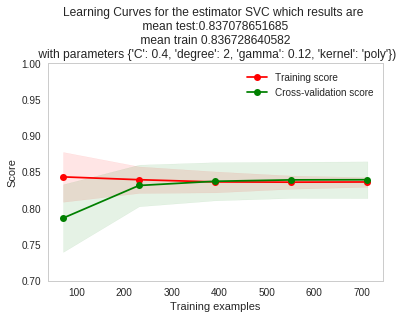

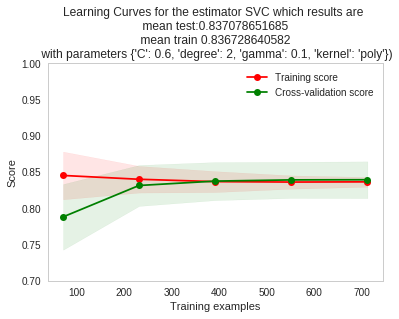

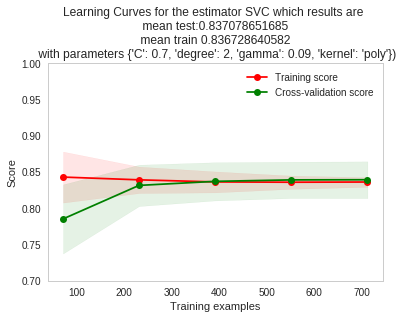

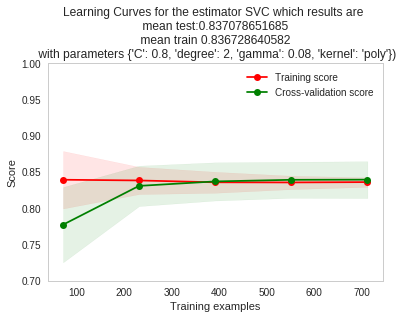

In [258]:
# Learning curve
df_study = svc_study
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

Model: SVC
Mean test: 0.837078651685
Mean train: 0.836728640582
Params: {'C': 0.4, 'degree': 2, 'gamma': 0.12, 'kernel': 'poly'}


Model: SVC
Mean test: 0.837078651685
Mean train: 0.836728640582
Params: {'C': 0.6, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


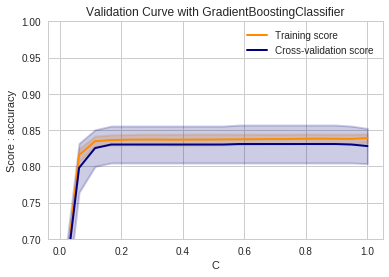

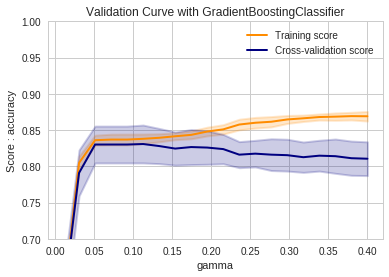

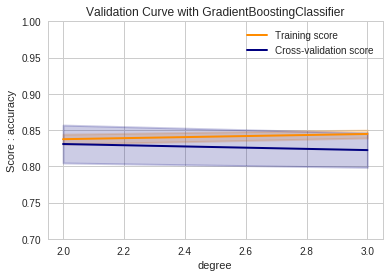

Model: SVC
Mean test: 0.837078651685
Mean train: 0.836728640582
Params: {'C': 0.7, 'degree': 2, 'gamma': 0.09, 'kernel': 'poly'}


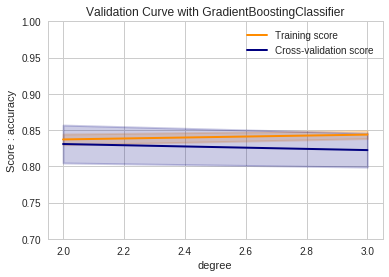

Model: SVC
Mean test: 0.837078651685
Mean train: 0.836728640582
Params: {'C': 0.8, 'degree': 2, 'gamma': 0.08, 'kernel': 'poly'}


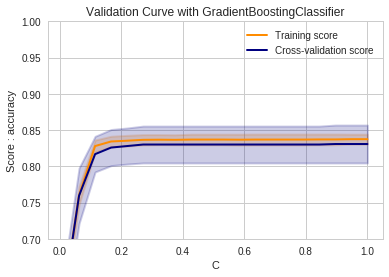

In [259]:
# Validation parameters setup
dict_Validation = { 
    'SVC': { 'C': np.linspace(0.01,1,20),
              'gamma': np.linspace(0.01,0.4,20),
              'degree': [2,3]}  
    }

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, clef, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [297]:
# Prediction 
svc_params = {'C': 0.8, 'degree': 2, 'gamma': 0.08, 'kernel': 'poly'}
svc = SVC(**svc_params)
svc.fit(data,target)
svc_pred = svc.predict(test_data)
Prediction['SVC'] = svc_pred

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
# Pipeline setup
models = { 
    'LogisticRegression': LogisticRegression()
}

# Parameters setup
params = {'LogisticRegression' : { 'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1],
           'penalty': ['l2'],
           'solver': ['newton-cg','lbfgs','liblinear','sag'],
           'max_iter': [100,250,500],
           'tol':  [1e-4,3e-4,7e-4,1e-3,3e-3],
          }
         }

# Lancer la grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reac


-------------------------------------------------------------------------------------------------------
Gridsearch for {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'max_iter': [100, 250, 500], 'tol': [0.0001, 0.0003, 0.0007, 0.001, 0.003]} 

Best score : 0.835674157303
Best params : {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}

Classification report on training set
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       447
          1       0.80      0.74      0.77       265

avg / total       0.83      0.83      0.83       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.81      0.83      0.82       102
          1       0.77      0.74      0.75        77

avg / total       0.79      0.79      0.79       179


Grid Score #cv_results_ alégé


Algo  mean_test_score  std_test_score  mean_train_score  std_train_score  \
482   lr         0.835674        0.038374          0.838132         0.008692   
494   lr         0.835674        0.038374          0.838484         0.008868   
509   lr         0.835674        0.038374          0.838132         0.008692   
508   lr         0.835674        0.038374          0.838132         0.008692   
507   lr         0.835674        0.038374          0.838132         0.008692   
505   lr         0.835674        0.038374          0.838132         0.008692   
504   lr         0.835674        0.038374          0.838132         0.008692   
503   lr         0.835674        0.038374          0.838132         0.008692   
502   lr         0.835674        0.038374          0.838132         0.008692   
501   lr         0.835674        0.038374          0.838132         0.008692   
500   lr         0.835674        0.038374          0.838132         0.008692   
497   lr         0.835674        0.038374          0.838132         0.008692   
496   lr         0.835674        0.038374          0.838132         0.008692   
495   lr         0.835674        0.038374          0.838132         0.008692   
493   lr         0.835674        0.038374          0.838484         0.008868   
511   lr         0.835674        0.038374          0.838484         0.008868   
492   lr         0.835674        0.038374          0.838484         0.008868   
491   lr         0.835674        0.038374          0.838484         0.008868   
490   lr         0.835674        0.038374          0.838484         0.008868   
489   lr         0.835674        0.038374          0.838132         0.008692   
488   lr         0.835674        0.038374          0.838132         0.008692   
487   lr         0.835674        0.038374          0.838132         0.008692   
486   lr         0.835674        0.038374          0.838132         0.008692   
485   lr         0.835674        0.038374          0.838132         0.008692   
484   lr         0.835674        0.038374          0.838132         0.008692   
483   lr         0.835674        0.038374          0.838132         0.008692   
481   lr         0.835674        0.038374          0.838132         0.008692   
480   lr         0.835674        0.038374          0.838132         0.008692   
510   lr         0.835674        0.038374          0.838484         0.008868   
506   lr         0.835674        0.038374          0.838132         0.008692   
..   ...              ...             ...               ...              ...   
93    lr         0.831461        0.039556          0.832865         0.009568   
92    lr         0.831461        0.039556          0.832865         0.009568   
91    lr         0.831461        0.039556          0.832865         0.009568   
90    lr         0.831461        0.039556          0.832865         0.009568   
89    lr         0.831461        0.039556          0.832865         0.009568   
88    lr         0.831461        0.039556          0.832865         0.009568   
87    lr         0.831461        0.039556          0.832865         0.009568   
86    lr         0.831461        0.039556          0.832865         0.009568   
85    lr         0.831461        0.039556          0.832865         0.009568   
102   lr         0.831461        0.039556          0.832865         0.009568   
103   lr         0.831461        0.039556          0.832865         0.009568   
104   lr         0.831461        0.039556          0.832865         0.009568   
114   lr         0.831461        0.039556          0.832865         0.009568   
121   lr         0.831461        0.037728          0.835674         0.009455   
120   lr         0.831461        0.037728          0.835674         0.009455   
119   lr         0.831461        0.039556          0.832865         0.009568   
118   lr         0.831461        0.039556          0.832865         0.009568   
117   lr         0.831461        0.039556          0.832865         0.009568   
116 


 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


Scores                                         Parameters
lr  0.835674  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so...


Summary


Algo  mean_test_score  std_test_score  mean_train_score  std_train_score  \
482   lr         0.835674        0.038374          0.838132         0.008692   
494   lr         0.835674        0.038374          0.838484         0.008868   
509   lr         0.835674        0.038374          0.838132         0.008692   
508   lr         0.835674        0.038374          0.838132         0.008692   
507   lr         0.835674        0.038374          0.838132         0.008692   
505   lr         0.835674        0.038374          0.838132         0.008692   
504   lr         0.835674        0.038374          0.838132         0.008692   
503   lr         0.835674        0.038374          0.838132         0.008692   
502   lr         0.835674        0.038374          0.838132         0.008692   
501   lr         0.835674        0.038374          0.838132         0.008692   
500   lr         0.835674        0.038374          0.838132         0.008692   
497   lr         0.835674        0.038374          0.838132         0.008692   
496   lr         0.835674        0.038374          0.838132         0.008692   
495   lr         0.835674        0.038374          0.838132         0.008692   
493   lr         0.835674        0.038374          0.838484         0.008868   
511   lr         0.835674        0.038374          0.838484         0.008868   
492   lr         0.835674        0.038374          0.838484         0.008868   
491   lr         0.835674        0.038374          0.838484         0.008868   
490   lr         0.835674        0.038374          0.838484         0.008868   
489   lr         0.835674        0.038374          0.838132         0.008692   
488   lr         0.835674        0.038374          0.838132         0.008692   
487   lr         0.835674        0.038374          0.838132         0.008692   
486   lr         0.835674        0.038374          0.838132         0.008692   
485   lr         0.835674        0.038374          0.838132         0.008692   
484   lr         0.835674        0.038374          0.838132         0.008692   
483   lr         0.835674        0.038374          0.838132         0.008692   
481   lr         0.835674        0.038374          0.838132         0.008692   
480   lr         0.835674        0.038374          0.838132         0.008692   
510   lr         0.835674        0.038374          0.838484         0.008868   
506   lr         0.835674        0.038374          0.838132         0.008692   
..   ...              ...             ...               ...              ...   
93    lr         0.831461        0.039556          0.832865         0.009568   
92    lr         0.831461        0.039556          0.832865         0.009568   
91    lr         0.831461        0.039556          0.832865         0.009568   
90    lr         0.831461        0.039556          0.832865         0.009568   
89    lr         0.831461        0.039556          0.832865         0.009568   
88    lr         0.831461        0.039556          0.832865         0.009568   
87    lr         0.831461        0.039556          0.832865         0.009568   
86    lr         0.831461        0.039556          0.832865         0.009568   
85    lr         0.831461        0.039556          0.832865         0.009568   
102   lr         0.831461        0.039556          0.832865         0.009568   
103   lr         0.831461        0.039556          0.832865         0.009568   
104   lr         0.831461        0.039556          0.832865         0.009568   
114   lr         0.831461        0.039556          0.832865         0.009568   
121   lr         0.831461        0.037728          0.835674         0.009455   
120   lr         0.831461        0.037728          0.835674         0.009455   
119   lr         0.831461        0.039556          0.832865         0.009568   
118   lr         0.831461        0.039556          0.832865         0.009568   
117   lr         0.831461        0.039556          0.832865         0.009568   
116 

Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


In [233]:
# Results dataframe
d_res

Algo  mean_test_score  std_test_score  \
225  GradientBoostingClassifier  0.839888         0.026750         
107  GradientBoostingClassifier  0.839888         0.027673         
177  GradientBoostingClassifier  0.838483         0.028953         
201  GradientBoostingClassifier  0.838483         0.025771         
130  GradientBoostingClassifier  0.838483         0.026454         
106  GradientBoostingClassifier  0.838483         0.026454         
63   GradientBoostingClassifier  0.837079         0.025488         
87   GradientBoostingClassifier  0.837079         0.022192         
109  GradientBoostingClassifier  0.837079         0.028391         
143  GradientBoostingClassifier  0.837079         0.030089         
223  GradientBoostingClassifier  0.837079         0.022360         
164  GradientBoostingClassifier  0.837079         0.029424         
86   GradientBoostingClassifier  0.835674         0.021405         
111  GradientBoostingClassifier  0.835674         0.027491         
110  GradientBoostingClassifier  0.835674         0.032087         
156  GradientBoostingClassifier  0.835674         0.036908         
131  GradientBoostingClassifier  0.834270         0.028489         
163  GradientBoostingClassifier  0.834270         0.025075         
202  GradientBoostingClassifier  0.834270         0.026414         
142  GradientBoostingClassifier  0.834270         0.029141         
204  GradientBoostingClassifier  0.834270         0.043446         
187  GradientBoostingClassifier  0.834270         0.028411         
141  GradientBoostingClassifier  0.832865         0.026934         
132  GradientBoostingClassifier  0.832865         0.027756         
166  GradientBoostingClassifier  0.832865         0.034357         
135  GradientBoostingClassifier  0.832865         0.029610         
133  GradientBoostingClassifier  0.832865         0.026043         
162  GradientBoostingClassifier  0.832865         0.028578         
161  GradientBoostingClassifier  0.832865         0.029158         
200  GradientBoostingClassifier  0.832865         0.020682         
..                          ...       ...              ...         
11   GradientBoostingClassifier  0.693820         0.107719         
28   GradientBoostingClassifier  0.634831         0.055739         
17   GradientBoostingClassifier  0.606742         0.001352         
18   GradientBoostingClassifier  0.606742         0.001352         
1    GradientBoostingClassifier  0.606742         0.001352         
16   GradientBoostingClassifier  0.606742         0.001352         
10   GradientBoostingClassifier  0.606742         0.001352         
9    GradientBoostingClassifier  0.606742         0.001352         
8    GradientBoostingClassifier  0.606742         0.001352         
25   GradientBoostingClassifier  0.606742         0.001352         
3    GradientBoostingClassifier  0.606742         0.001352         
2    GradientBoostingClassifier  0.606742         0.001352         
24   GradientBoostingClassifier  0.606742         0.001352         
32   GradientBoostingClassifier  0.606742         0.001352         
26   GradientBoostingClassifier  0.606742         0.001352         
27   GradientBoostingClassifier  0.606742         0.001352         
33   GradientBoostingClassifier  0.606742         0.001352         
34   GradientBoostingClassifier  0.606742         0.001352         
35   GradientBoostingClassifier  0.606742         0.001352         
40   GradientBoostingClassifier  0.606742         0.001352         
41   GradientBoostingClassifier  0.606742         0.001352         
42   GradientBoostingClassifier  0.606742         0.001352         
43   GradientBoostingClassifier  0.606742         0.001352         
48   GradientBoostingClassifier  0.606742         0.001352         
56   GradientBoostingClassifier  0.606742         0.001352         
64   GradientBoostingClassifier  0.606742         0.001352         
72   GradientBoostingClassifier  0.606742         0.001352         
80   GradientBo

In [234]:
# Selection of the parameters to study
index_selection = [177,130,106,63,87,86]
df_study = d_res.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
df_study

Algo  \
177  GradientBoostingClassifier   
130  GradientBoostingClassifier   
106  GradientBoostingClassifier   
63   GradientBoostingClassifier   
87   GradientBoostingClassifier   
86   GradientBoostingClassifier   

                                                                                 params  \
177  {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 10}    
130  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 15}    
106  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}       
63   {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 40}      
87   {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}   
86   {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 35}   

     mean_test_score  mean_train_score  
177  0.838483         0.858846          
130  0.838483         0.857445          
106  0.838483         0.854283          
63   0.837079         0.852176          
87   0.837079         0.851823          
86   0.835674         0.849717

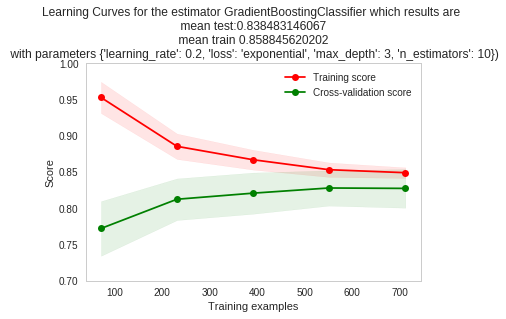

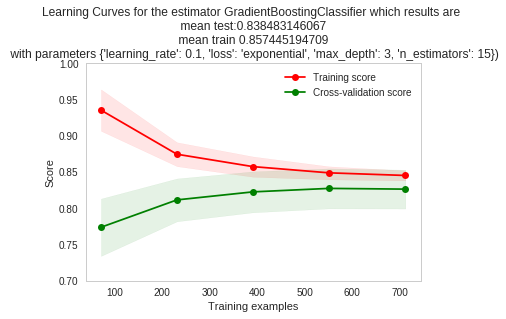

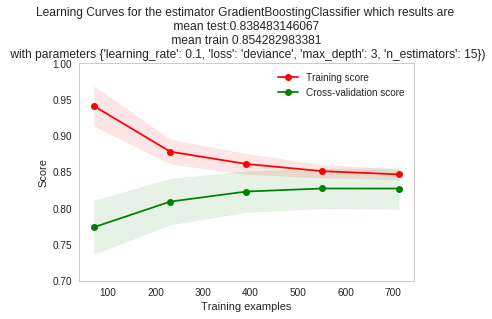

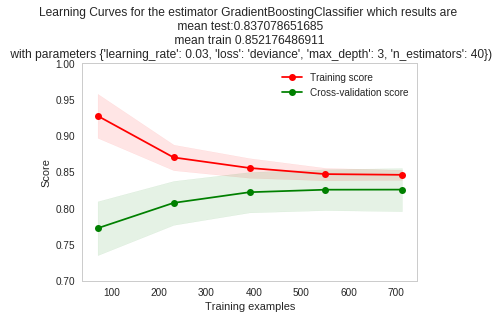

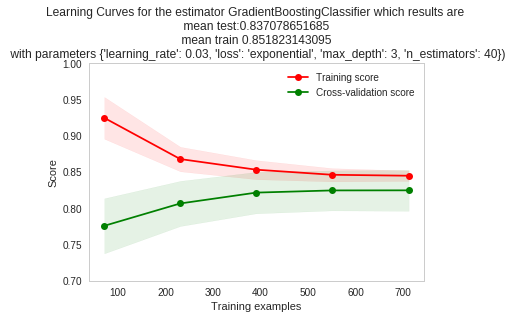

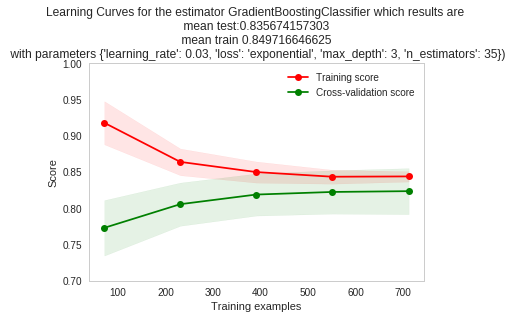

In [244]:
# Learning curve
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.858845620202
Params: {'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 10}


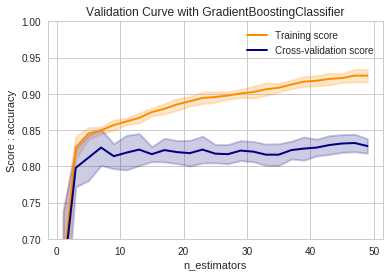

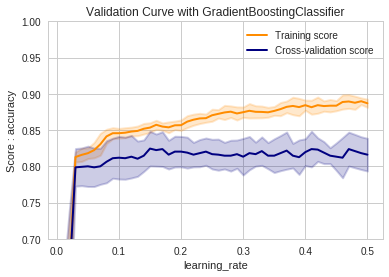

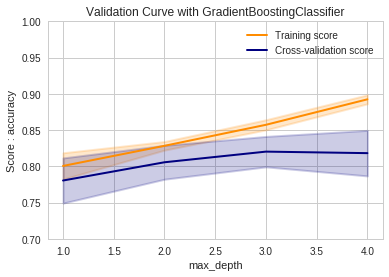

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.857445194709
Params: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 15}


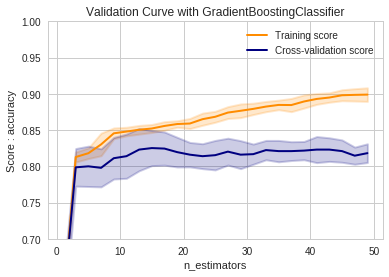

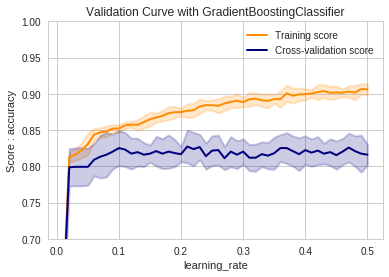

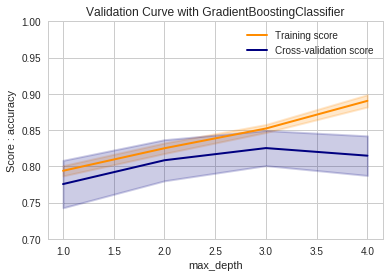

Model: GradientBoostingClassifier
Mean test: 0.838483146067
Mean train: 0.854282983381
Params: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 15}


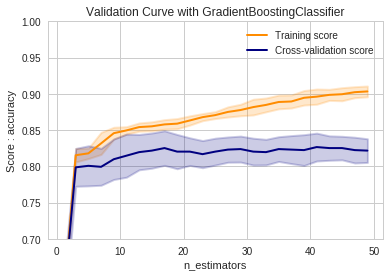

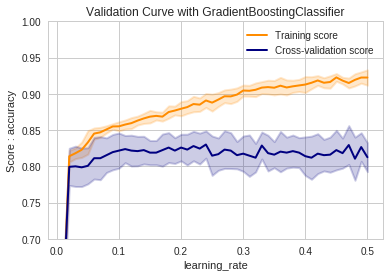

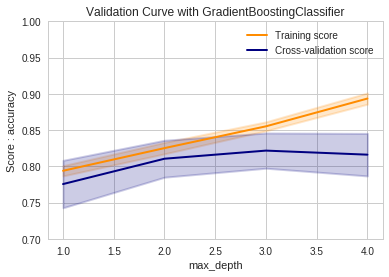

Model: GradientBoostingClassifier
Mean test: 0.837078651685
Mean train: 0.852176486911
Params: {'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 40}


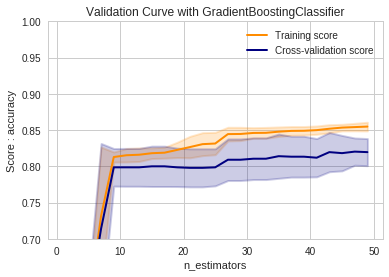

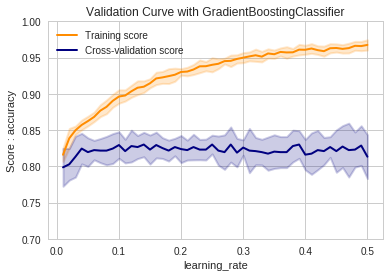

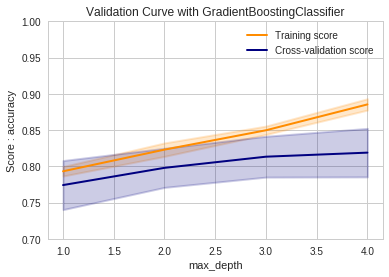

Model: GradientBoostingClassifier
Mean test: 0.837078651685
Mean train: 0.851823143095
Params: {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}


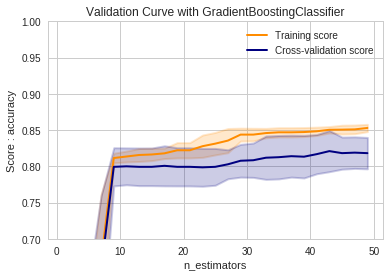

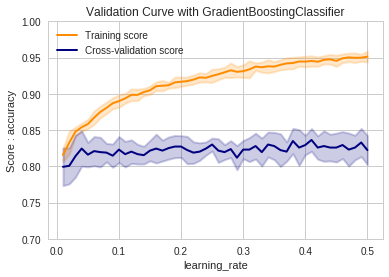

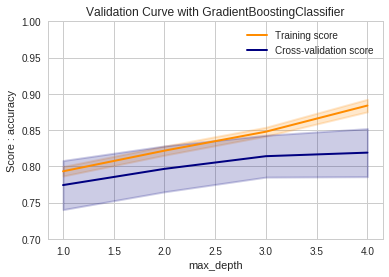

Model: GradientBoostingClassifier
Mean test: 0.835674157303
Mean train: 0.849716646625
Params: {'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 35}


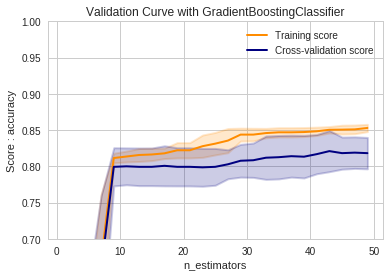

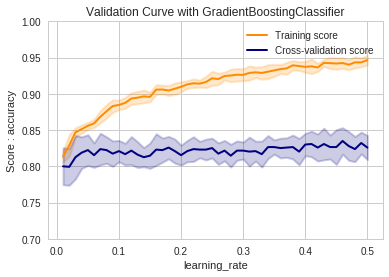

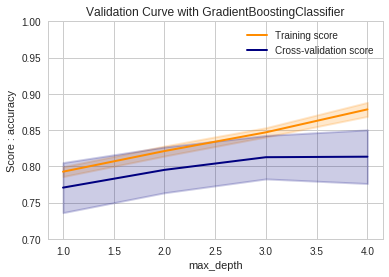

In [248]:
# Validation parameters setup
dict_Validation = { 
    'GradientBoostingClassifier': {'n_estimators': range(1,50,2),
                                  'learning_rate': np.linspace(0.01,0.5,50),
                                  'max_depth': range(1,5,1)}  
}

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, clef, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [249]:
# Prediction 
lr_parm = {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
lr = LogisticRegression(**lr_parm)
lr.fit(X_train,y_train)
lr_pred = lr.predict(test_data)
Prediction['LR'] = lr_pred

### Voting Classifier

In [118]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

In [121]:
# Classifier default parameters
abc = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 20)        
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

# Classifier Tunep parameters
abc_tp = AdaBoostClassifier()  
lda_tp = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr_tp = LogisticRegression(C = 0.2, max_iter = 10, n_jobs = -1, penalty = 'l2', solver = 'sag', tol = 0.001)
svc_tp = SVC(C=0.5, gamma=0.10, kernel='poly', degree=3, probability= True)
rfc_tp = RandomForestClassifier(criterion = 'gini', max_features = 12, min_samples_leaf = 10,
                             min_samples_split = 5, n_estimators = 30)
gbc_tp = GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=4, n_estimators=60)

models = { 
    'VotingClassifier': VotingClassifier(estimators=[ ('lr', lr),('lda', lda), ('svc', svc), ('rfc', rfc), ('gbc', gbc)])
}

# Parameters setup
params = {'VotingClassifier' : { 'estimators' : [                                          
                                          [('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('lr_tp', lr_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('lda_tp', lda_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('abc_tp', abc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)]
                                          ],
                                   'voting': ['soft']
          }
         }

# Lancer la grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear


-------------------------------------------------------------------------------------------------------
Gridsearch for {'estimators': [[('rfc_tp', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)), ('gbc_tp', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))], [('svc_tp', SVC(C=0.5,

Algo  mean_test_score  std_test_score  mean_train_score  \
2  VotingClassifier  0.832865         0.035803        0.917487           
3  VotingClassifier  0.831461         0.028760        0.900284           
0  VotingClassifier  0.830056         0.038517        0.945573           
1  VotingClassifier  0.830056         0.022859        0.902741           
4  VotingClassifier  0.827247         0.041892        0.945923           

   std_train_score  \
2  0.005309          
3  0.010232          
0  0.005907          
1  0.004338          
4  0.005637          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     params  
2  {'estimators': [('lr_tp', LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.001,
          verbose=0, warm_start=False)), ('rfc_tp', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)), ('gbc_tp', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))], 'voting': 'soft'}  
3  {'estimators': [('lda_tp', LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('rfc_tp', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)), ('gbc_tp', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))], 'voting': 'soft'}                                                                                                               


 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


Scores  \
VotingClassifier  0.832865   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Parameters  
VotingClassifier  {'estimators': [('lr_tp', LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.001,
          verbose=0, warm_start=False)), ('rfc_tp', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)), ('gbc_tp', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))], 'voting': 'soft'}


Summary


Algo  mean_test_score  std_test_score  mean_train_score  \
2  VotingClassifier  0.832865         0.035803        0.917487           
3  VotingClassifier  0.831461         0.028760        0.900284           
0  VotingClassifier  0.830056         0.038517        0.945573           
1  VotingClassifier  0.830056         0.022859        0.902741           
4  VotingClassifier  0.827247         0.041892        0.945923           

   std_train_score  \
2  0.005309          
3  0.010232          
0  0.005907          
1  0.004338          
4  0.005637          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     params  
2  {'estimators': [('lr_tp', LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.001,
          verbose=0, warm_start=False)), ('rfc_tp', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)), ('gbc_tp', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))], 'voting': 'soft'}  
3  {'estimators': [('lda_tp', LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('rfc_tp', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)), ('gbc_tp', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))], 'voting': 'soft'}                                                                                                               

Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


In [35]:
# Classifier Tunep parameters
# Score 0.77
abc_tp = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 20)  
lda_tp = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr_tp = LogisticRegression(C = 0.2, max_iter = 10, n_jobs = -1, penalty = 'l2', solver = 'sag', tol = 0.001)
svc_tp = SVC(C=0.5, gamma=0.10, kernel='poly', degree=3, probability= True)
rfc_tp = RandomForestClassifier(criterion = 'gini', max_features = 12, min_samples_leaf = 10,
                             min_samples_split = 5, n_estimators = 30)
gbc_tp = GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=4, n_estimators=60)


# [ ('lr_tp', lr_tp),('lda_tp', lda_tp), ('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)]
VC_tp_soft = VotingClassifier(estimators=[
                                          [('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('lr_tp', lr_tp)],, ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp),
                                          [('lda_tp', lda_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp), ],
                                          [('abc_tp', abc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp),]
                                          
                                          
                                         voting=['soft','hard'])
VC_tp_soft.fit(X_train,y_train)
Prediction['VC_tp_soft'] = VC_tp_soft.predict(Eval_OH_Std)

/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [112]:
# Classifier Not Tunep parameters
# Score 0.77

abc = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 20)        
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()



VC_nottp_soft = VotingClassifier(estimators=[ ('lr_tp', lr_tp),('lda_tp', lda_tp), ('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                         voting='soft')
VC_nottp_soft.fit(data,target)
Prediction['VC_nottp_soft'] = VC_nottp_soft.predict(Eval_OH_Std)

/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
pd.set_option('display.max_colwidth', -1)

In [36]:
Eval_OH_Std.shape

(418, 25)

In [37]:
Prediction.shape

(418, 2)

### Submission

In [ ]:
estim = #  Remplir ici
Prediction = estim.predict(Eval_OH_Std)

In [298]:
Prediction = Prediction['SVC']

In [299]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Prediction
    })
submission.to_csv('titanic_svc3_pred.csv', index=False)